In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import glob
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Creating train test val data for each model

In [8]:
positive_hr_all = './all_combined/hr/positive_class'
negative_hr_all = './all_combined/hr/negative_class'
positive_hr_real = './real_only/hr/positive_class'
negative_hr_real = './real_only/hr/negative_class'

positive_gsr_all = './all_combined/gsr/positive_class'
negative_gsr_all = './all_combined/gsr/negative_class'
positive_gsr_real = './real_only/gsr/positive_class'
negative_gsr_real = './real_only/gsr/negative_class'

#Load data function
def load_data(folder, label):
    data = []
    labels = []
    for file in glob.glob(os.path.join(folder, '*.csv')):
      df = pd.read_csv(file)
      signal = df.values[0][1:].astype(float)
      data.append(signal)
      labels.append(label)
    return np.array(data), np.array(labels)

#Loading hr and gsr data
data_positive_hr_all, labels_positive_hr_all = load_data(positive_hr_all, 1)
data_negative_hr_all, labels_negative_hr_all = load_data(negative_hr_all, 0)
data_positive_hr_real, labels_positive_hr_real = load_data(positive_hr_real, 1)
data_negative_hr_real, labels_negative_hr_real = load_data(negative_hr_real, 0)

data_positive_gsr_all, labels_positive_gsr_all = load_data(positive_gsr_all, 1)
data_negative_gsr_all, labels_negative_gsr_all = load_data(negative_gsr_all, 0)
data_positive_gsr_real, labels_positive_gsr_real = load_data(positive_gsr_real, 1)
data_negative_gsr_real, labels_negative_gsr_real = load_data(negative_gsr_real, 0)

#Concatenate data and labels
X_hr_all = np.concatenate((data_positive_hr_all, data_negative_hr_all), axis=0)
y_hr_all = np.concatenate((labels_positive_hr_all, labels_negative_hr_all), axis=0)
X_hr_real = np.concatenate((data_positive_hr_real, data_negative_hr_real), axis=0)
y_hr_real = np.concatenate((labels_positive_hr_real, labels_negative_hr_real), axis=0)

X_gsr_all = np.concatenate((data_positive_gsr_all, data_negative_gsr_all), axis=0)
y_gsr_all = np.concatenate((labels_positive_gsr_all, labels_negative_gsr_all), axis=0)
X_gsr_real = np.concatenate((data_positive_gsr_real, data_negative_gsr_real), axis=0)
y_gsr_real = np.concatenate((labels_positive_gsr_real, labels_negative_gsr_real), axis=0)

#Normalize data
scaler = StandardScaler()
X_hr_all = scaler.fit_transform(X_hr_all)
X_hr_real = scaler.fit_transform(X_hr_real)
X_gsr_all = scaler.fit_transform(X_gsr_all)
X_gsr_real = scaler.fit_transform(X_gsr_real)


In [5]:
print('GSR all')
X_gsr_all.shape, y_gsr_all.shape

GSR all


((1274, 8), (1274,))

In [6]:
print('GSR real')
X_gsr_real.shape, y_gsr_real.shape

GSR real


((804, 8), (804,))

In [7]:
print('HR all')
X_hr_all.shape, y_hr_all.shape

HR all


((1274, 8), (1274,))

In [8]:
print('HR real')
X_hr_real.shape, y_hr_real.shape

HR real


((804, 8), (804,))

In [9]:
print("Is X HR real == X GSR real ?")
print(X_hr_real.shape == X_gsr_real.shape)

Is X HR real == X GSR real ?
True


In [10]:
print("Is X HR all == X GSR all ?")
print(X_hr_all.shape == X_gsr_all.shape)

Is X HR all == X GSR all ?
True


In [11]:
print("Is y HR real == y GSR real ?")
print(y_hr_real.shape == y_gsr_real.shape)

Is y HR real == y GSR real ?
True


In [12]:
print("Is y HR all == y GSR all ?")
print(y_hr_all.shape == y_gsr_all.shape)

Is y HR all == y GSR all ?
True


In [13]:
#Check if labels match
assert np.array_equal(y_hr_all, y_gsr_all) and np.array_equal(y_hr_real, y_gsr_real)

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# Create indices for splitting
# Indices have to be matched because we want to train a model on 3 different signals

indices_all = np.arange(len(y_hr_all))
X_train_indices_all, X_temp_indices_all, y_train_indices_all, y_temp_indices_all = train_test_split(indices_all, indices_all, test_size=0.2, random_state=42)
X_val_indices_all, X_test_indices_all, y_val_indices_all, y_test_indices_all = train_test_split(X_temp_indices_all, y_temp_indices_all, test_size=0.5, random_state=42)

indices_real = np.arange(len(y_hr_real))
X_train_indices_real, X_temp_indices_real, y_train_indices_real, y_temp_indices_real = train_test_split(indices_real, indices_real, test_size=0.2, random_state=42)
X_val_indices_real, X_test_indices_real, y_val_indices_real, y_test_indices_real = train_test_split(X_temp_indices_real, y_temp_indices_real, test_size=0.5, random_state=42)

# Split hr and gsr X data based on the same indices

# For 'all' data
X_train_data_hr_all, X_val_data_hr_all, X_test_data_hr_all = X_hr_all[X_train_indices_all], X_hr_all[X_val_indices_all], X_hr_all[X_test_indices_all]
y_train_data_hr_all, y_val_data_hr_all, y_test_data_hr_all = y_hr_all[y_train_indices_all], y_hr_all[y_val_indices_all], y_hr_all[y_test_indices_all]

X_train_data_gsr_all, X_val_data_gsr_all, X_test_data_gsr_all = X_gsr_all[X_train_indices_all], X_gsr_all[X_val_indices_all], X_gsr_all[X_test_indices_all]
y_train_data_gsr_all, y_val_data_gsr_all, y_test_data_gsr_all = y_gsr_all[y_train_indices_all], y_gsr_all[y_val_indices_all], y_gsr_all[y_test_indices_all]

# For 'real' data
X_train_data_hr_real, X_val_data_hr_real, X_test_data_hr_real = X_hr_real[X_train_indices_real], X_hr_real[X_val_indices_real], X_hr_real[X_test_indices_real]
y_train_data_hr_real, y_val_data_hr_real, y_test_data_hr_real = y_hr_real[y_train_indices_real], y_hr_real[y_val_indices_real], y_hr_real[y_test_indices_real]

X_train_data_gsr_real, X_val_data_gsr_real, X_test_data_gsr_real = X_gsr_real[X_train_indices_real], X_gsr_real[X_val_indices_real], X_gsr_real[X_test_indices_real]
y_train_data_gsr_real, y_val_data_gsr_real, y_test_data_gsr_real = y_gsr_real[y_train_indices_real], y_gsr_real[y_val_indices_real], y_gsr_real[y_test_indices_real]

# Check shapes to confirm splits
print(f'Train HR All Shape: {X_train_data_hr_all.shape}')
print(f'Validation HR All Shape: {X_val_data_hr_all.shape}')
print(f'Test HR All Shape: {X_test_data_hr_all.shape}')
print()
print(f'Train GSR All Shape: {X_train_data_gsr_all.shape}')
print(f'Validation GSR All Shape: {X_val_data_gsr_all.shape}')
print(f'Test GSR All Shape: {X_test_data_gsr_all.shape}')
print()
print(f'Train HR Real Shape: {X_train_data_hr_real.shape}')
print(f'Validation HR Real Shape: {X_val_data_hr_real.shape}')
print(f'Test HR Real Shape: {X_test_data_hr_real.shape}')
print()
print(f'Train GSR Real Shape: {X_train_data_gsr_real.shape}')
print(f'Validation GSR Real Shape: {X_val_data_gsr_real.shape}')
print(f'Test GSR Real Shape: {X_test_data_gsr_real.shape}')


Train HR All Shape: (1019, 8)
Validation HR All Shape: (127, 8)
Test HR All Shape: (128, 8)

Train GSR All Shape: (1019, 8)
Validation GSR All Shape: (127, 8)
Test GSR All Shape: (128, 8)

Train HR Real Shape: (643, 8)
Validation HR Real Shape: (80, 8)
Test HR Real Shape: (81, 8)

Train GSR Real Shape: (643, 8)
Validation GSR Real Shape: (80, 8)
Test GSR Real Shape: (81, 8)


In [10]:
#Rescale for 1D CNNs

data_variables = [
    'X_train_data_hr_all', 'X_test_data_hr_all',
    'X_train_data_hr_real', 'X_test_data_hr_real',
    'X_train_data_gsr_real', 'X_test_data_gsr_real',
    'X_train_data_gsr_all', 'X_test_data_gsr_all',
    'X_val_data_hr_all', 'X_val_data_gsr_all',
    'X_val_data_hr_real', 'X_val_data_gsr_real'
]

for var in data_variables:
    locals()[var] = locals()[var][..., np.newaxis]


In [11]:
#Load eeg data

def load_eeg(data_dir):
    data_paths = []
    labels = []
    for class_dir in ['positive_class', 'negative_class']:
        class_path = os.path.join(data_dir, class_dir)
        label = 1 if class_dir == 'positive_class' else 0
        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)
            data_paths.append(file_path)
            labels.append(label)
    return np.array(data_paths), np.array(labels)

eeg_paths_all, eeg_labels_all = load_eeg('./all_combined/eeg_images')
eeg_paths_real, eeg_labels_real = load_eeg('./real_only/eeg_images')

In [12]:
# These should all be the same
X_hr_all.shape[0], X_gsr_all.shape[0], eeg_paths_all.shape[0]

(1274, 1274, 1274)

In [13]:
# These should all be the same
y_hr_all.shape[0], y_gsr_all.shape[0], eeg_labels_all.shape[0]

(1274, 1274, 1274)

In [14]:
# For 'all' data
X_eeg_train_paths_all, X_eeg_val_paths_all, X_eeg_test_paths_all = eeg_paths_all[X_train_indices_all], eeg_paths_all[X_val_indices_all], eeg_paths_all[X_test_indices_all]
y_eeg_train_paths_all, y_eeg_val_paths_all, y_eeg_test_paths_all = eeg_labels_all[y_train_indices_all], eeg_labels_all[y_val_indices_all], eeg_labels_all[y_test_indices_all]

# For 'real' data
X_eeg_train_paths_real, X_eeg_val_paths_real, X_eeg_test_paths_real = eeg_paths_real[X_train_indices_real], eeg_paths_real[X_val_indices_real], eeg_paths_real[X_test_indices_real]
y_eeg_train_paths_real, y_eeg_val_paths_real, y_eeg_test_paths_real = eeg_labels_real[y_train_indices_real], eeg_labels_real[y_val_indices_real], eeg_labels_real[y_test_indices_real]


In [15]:
print(f'Train HR All Shape: {X_train_data_hr_all.shape}')
print(f'Validation HR All Shape: {X_val_data_hr_all.shape}')
print(f'Test HR All Shape: {X_test_data_hr_all.shape}')
print()
print(f'Train GSR All Shape: {X_train_data_gsr_all.shape}')
print(f'Validation GSR All Shape: {X_val_data_gsr_all.shape}')
print(f'Test GSR All Shape: {X_test_data_gsr_all.shape}')
print()
print(f'Train EEG All Paths Shape: {X_eeg_train_paths_all.shape}')
print(f'Validation EEG All Paths Shape: {X_eeg_val_paths_all.shape}')
print(f'Test EEG All Paths Shape: {X_eeg_test_paths_all.shape}')
print()
print(f'Train HR Real Shape: {X_train_data_hr_real.shape}')
print(f'Validation HR Real Shape: {X_val_data_hr_real.shape}')
print(f'Test HR Real Shape: {X_test_data_hr_real.shape}')
print()
print(f'Train GSR Real Shape: {X_train_data_gsr_real.shape}')
print(f'Validation GSR Real Shape: {X_val_data_gsr_real.shape}')
print(f'Test GSR Real Shape: {X_test_data_gsr_real.shape}')
print()
print(f'Train EEG Real Paths Shape: {X_eeg_train_paths_real.shape}')
print(f'Validation EEG Real Paths Shape: {X_eeg_val_paths_real.shape}')
print(f'Test EEG Real Paths Shape: {X_eeg_test_paths_real.shape}')

Train HR All Shape: (1019, 8, 1)
Validation HR All Shape: (127, 8, 1)
Test HR All Shape: (128, 8, 1)

Train GSR All Shape: (1019, 8, 1)
Validation GSR All Shape: (127, 8, 1)
Test GSR All Shape: (128, 8, 1)

Train EEG All Paths Shape: (1019,)
Validation EEG All Paths Shape: (127,)
Test EEG All Paths Shape: (128,)

Train HR Real Shape: (643, 8, 1)
Validation HR Real Shape: (80, 8, 1)
Test HR Real Shape: (81, 8, 1)

Train GSR Real Shape: (643, 8, 1)
Validation GSR Real Shape: (80, 8, 1)
Test GSR Real Shape: (81, 8, 1)

Train EEG Real Paths Shape: (643,)
Validation EEG Real Paths Shape: (80,)
Test EEG Real Paths Shape: (81,)


In [16]:
# These should all be the same
X_train_data_hr_all.shape[0], X_train_data_gsr_all.shape[0], X_eeg_train_paths_all.shape[0]

(1019, 1019, 1019)

In [17]:
# These should all be the same
X_train_data_hr_real.shape[0], X_train_data_gsr_real.shape[0], X_eeg_train_paths_real.shape[0]

(643, 643, 643)

# Heart rate 1D CNN Model

## All data combined

In [18]:
print(f'X_train shape: {X_train_data_hr_all.shape}')
print(f'X_test shape: {X_test_data_hr_all.shape}')


X_train shape: (1019, 8, 1)
X_test shape: (128, 8, 1)


In [27]:
def cnn1D(input_shape):
    model = models.Sequential()

    model.add(layers.Input(shape=input_shape))

    model.add(layers.Reshape((input_shape[0], input_shape[1])))

    #First layer
    model.add(layers.Conv1D(filters=16,
                            kernel_size=3,
                            padding='same',
                            activation='relu'))

    model.add(layers.MaxPooling1D(pool_size=2))

    #Second layer
    model.add(layers.Conv1D(filters=32,
                            kernel_size=3,
                            padding='same',
                            activation='relu'))

    model.add(layers.MaxPooling1D(pool_size=2))

    #Flatten
    model.add(layers.Flatten())

    #LSTM
    model.add(layers.Reshape((1, -1)))
    model.add(layers.LSTM(512, return_sequences=False))

    #Dense layers
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=4, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=1, activation='sigmoid'))  #sigmoid activation for binary classification

    return model

input_shape = (8, 1)
model = cnn1D(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 8, 1)              0         
                                                                 
 conv1d (Conv1D)             (None, 8, 16)             64        
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 16)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 32)             1568      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 2, 32)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0

In [28]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor the validation loss
                               patience=10,          # Number of epochs with no improvement after which training will be stopped
                               verbose=1,           # Print messages when stopping
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

#Compile model with binary loss fucntion
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
#Train on 'all' data
history = model.fit(X_train_data_hr_all, y_train_data_hr_all, epochs=100, batch_size=32, validation_data=(X_val_data_hr_all, y_val_data_hr_all), callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test_data_hr_all, y_test_data_hr_all)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/100
32/32 [==============================] - 3s 28ms/step - loss: 0.6897 - accuracy: 0.5280 - val_loss: 0.6623 - val_accuracy: 0.6457
Epoch 2/100
32/32 [==============================] - 0s 15ms/step - loss: 0.6748 - accuracy: 0.5613 - val_loss: 0.6328 - val_accuracy: 0.6220
Epoch 3/100
32/32 [==============================] - 1s 16ms/step - loss: 0.6776 - accuracy: 0.5604 - val_loss: 0.6504 - val_accuracy: 0.6299
Epoch 4/100
32/32 [==============================] - 1s 16ms/step - loss: 0.6644 - accuracy: 0.5810 - val_loss: 0.6379 - val_accuracy: 0.6142
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 0.6759 - accuracy: 0.5741 - val_loss: 0.6425 - val_accuracy: 0.6299
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6698 - accuracy: 0.5878 - val_loss: 0.6338 - val_accuracy: 0.6378
Epoch 7/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6795 - accuracy: 0.5613 - val_loss: 0.6485 - val_accuracy: 0.6220
Epoch 

In [30]:
#Save 'all' model for ensemble
model.save('./Trained models/hr_model_all.keras')

4/4 [==============================] - 0s 8ms/step


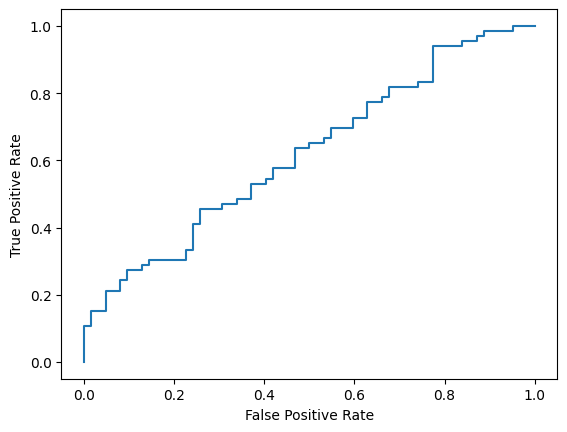

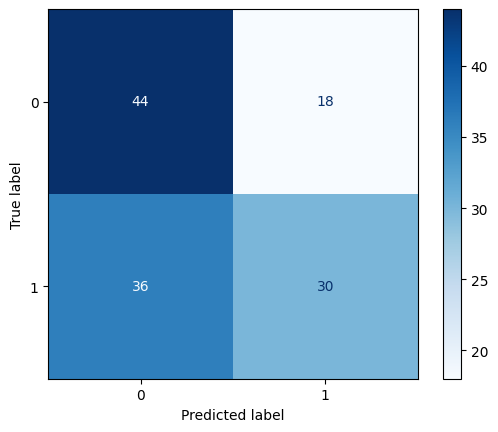

In [31]:
y_pred = model.predict(X_test_data_hr_all)
y_pred = y_pred.flatten()
fpr, tpr, _ = roc_curve(y_test_data_hr_all,y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


threshold = 0.5
y_pred_labels = (y_pred >= threshold).astype(int)
# Generate confusion matrix
cm = confusion_matrix(y_test_data_hr_all, y_pred_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

## Real only

In [32]:
#Reinstantiate model to train and save it for real only data
model = cnn1D(input_shape)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
#Train on 'real' data
    
history = model.fit(X_train_data_hr_real, y_train_data_hr_real, epochs=100, batch_size=32, validation_data=(X_val_data_hr_real, y_val_data_hr_real), callbacks = [early_stopping])

loss, accuracy = model.evaluate(X_test_data_hr_real, y_test_data_hr_real)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Epoch 1/100


21/21 [==============================] - 2s 28ms/step - loss: 0.6773 - accuracy: 0.5770 - val_loss: 0.6225 - val_accuracy: 0.7000
Epoch 2/100
21/21 [==============================] - 0s 14ms/step - loss: 0.6565 - accuracy: 0.5630 - val_loss: 0.5940 - val_accuracy: 0.7000
Epoch 3/100
21/21 [==============================] - 0s 16ms/step - loss: 0.6456 - accuracy: 0.6112 - val_loss: 0.5972 - val_accuracy: 0.7250
Epoch 4/100
21/21 [==============================] - 0s 15ms/step - loss: 0.6405 - accuracy: 0.6485 - val_loss: 0.5934 - val_accuracy: 0.7250
Epoch 5/100
21/21 [==============================] - 0s 16ms/step - loss: 0.6357 - accuracy: 0.6345 - val_loss: 0.5820 - val_accuracy: 0.7250
Epoch 6/100
21/21 [==============================] - 0s 14ms/step - loss: 0.6611 - accuracy: 0.6470 - val_loss: 0.6207 - val_accuracy: 0.7125
Epoch 7/100
21/21 [==============================] - 0s 15ms/step - loss: 0.6469 - accuracy: 0.6547 - val_loss: 0.5903 - val_accuracy: 0.7250
Epoch 8/100
21/21 

In [34]:
#Save 'real' model for ensemble
model.save('./Trained models/hr_model_real.keras')

3/3 [==============================] - 0s 3ms/step


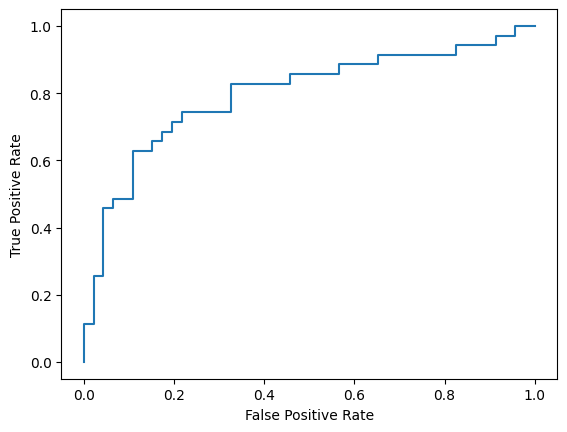

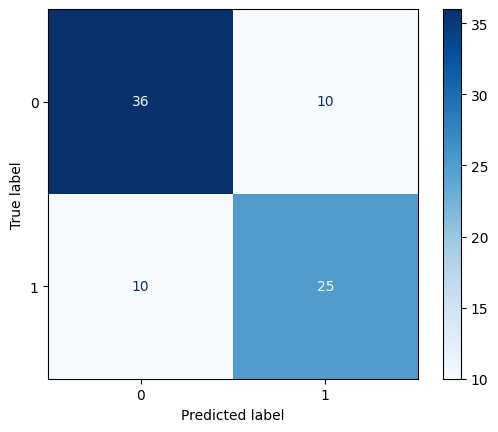

In [35]:
y_pred = model.predict(X_test_data_hr_real)
y_pred = y_pred.flatten()

fpr, tpr, _ = roc_curve(y_test_data_hr_real,y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


threshold = 0.5
y_pred_labels = (y_pred >= threshold).astype(int)
# Generate confusion matrix
cm = confusion_matrix(y_test_data_hr_real, y_pred_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

# GSR 1D CNN Model

## All combined

In [36]:
print(f'X_train shape: {X_train_data_gsr_all.shape}')
print(f'X_test shape: {X_test_data_gsr_all.shape}')


X_train shape: (1019, 8, 1)
X_test shape: (128, 8, 1)


In [37]:
def cnn1D(input_shape):
    model = models.Sequential()

    model.add(layers.Input(shape=input_shape))

    model.add(layers.Reshape((input_shape[0], input_shape[1])))

    #First layer
    model.add(layers.Conv1D(filters=16,
                            kernel_size=3,
                            padding='same',
                            activation='relu'))

    model.add(layers.MaxPooling1D(pool_size=2))

    #Second layer
    model.add(layers.Conv1D(filters=32,
                            kernel_size=3,
                            padding='same',
                            activation='relu'))

    model.add(layers.MaxPooling1D(pool_size=2))

    #Flatten
    model.add(layers.Flatten())

    #LSTM
    model.add(layers.Reshape((1, -1)))
    model.add(layers.LSTM(512, return_sequences=False))

    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=4, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=1, activation='sigmoid'))  #sigmoid activation for binary classification

    return model

input_shape = (8, 1)
model = cnn1D(input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 8, 1)              0         
                                                                 
 conv1d_4 (Conv1D)           (None, 8, 16)             64        
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 4, 16)             0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 4, 32)             1568      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 2, 32)             0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 64)               

In [38]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor the validation loss
                               patience=10,          # Number of epochs with no improvement after which training will be stopped
                               verbose=1,           # Print messages when stopping
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

#Compile model with binary loss fucntion
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
#Train on all data
history = model.fit(X_train_data_gsr_all, y_train_data_gsr_all, epochs=100, batch_size=32, validation_data=(X_val_data_gsr_all, y_val_data_gsr_all), callbacks = [early_stopping])

loss, accuracy = model.evaluate(X_test_data_gsr_all, y_test_data_gsr_all)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/100
32/32 [==============================] - 2s 25ms/step - loss: 0.6960 - accuracy: 0.5074 - val_loss: 0.6942 - val_accuracy: 0.4646
Epoch 2/100
32/32 [==============================] - 0s 14ms/step - loss: 0.6930 - accuracy: 0.5221 - val_loss: 0.6960 - val_accuracy: 0.4646
Epoch 3/100
32/32 [==============================] - 0s 14ms/step - loss: 0.6930 - accuracy: 0.5132 - val_loss: 0.6932 - val_accuracy: 0.4803
Epoch 4/100
32/32 [==============================] - 0s 15ms/step - loss: 0.6938 - accuracy: 0.4868 - val_loss: 0.6928 - val_accuracy: 0.5433
Epoch 5/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6916 - accuracy: 0.5289 - val_loss: 0.6934 - val_accuracy: 0.4882
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6942 - accuracy: 0.5152 - val_loss: 0.6934 - val_accuracy: 0.4961
Epoch 7/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6921 - accuracy: 0.5083 - val_loss: 0.6950 - val_accuracy: 0.4961
Epoch 

In [40]:
#Save all model for ensemble
model.save('./Trained models/gsr_model_all.keras')


4/4 [==============================] - 0s 7ms/step


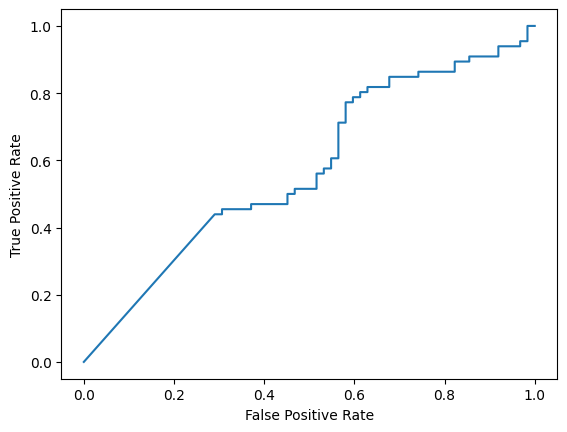

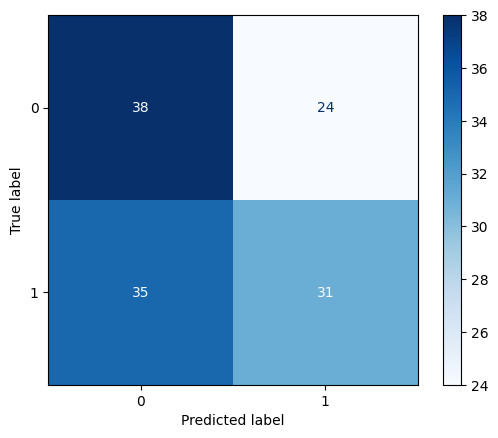

In [41]:
y_pred = model.predict(X_test_data_gsr_all)
y_pred = y_pred.flatten()

#Generate and display roc curve
fpr, tpr, _ = roc_curve(y_test_data_gsr_all,y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


threshold = 0.5
y_pred_labels = (y_pred >= threshold).astype(int)
#Generate and display confusion matrix
cm = confusion_matrix(y_test_data_gsr_all, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

## Real only

In [42]:
#Reinstantiate model to train and save it for real only data
model = cnn1D(input_shape)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
#Train on real data
history = model.fit(X_train_data_gsr_real, y_train_data_gsr_real, epochs=100, batch_size=32, validation_data=(X_val_data_gsr_real, y_val_data_gsr_real), callbacks = [early_stopping])

loss, accuracy = model.evaluate(X_test_data_gsr_real, y_test_data_gsr_real)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Epoch 1/100
21/21 [==============================] - 2s 28ms/step - loss: 0.6948 - accuracy: 0.5194 - val_loss: 0.6911 - val_accuracy: 0.5625
Epoch 2/100
21/21 [==============================] - 0s 14ms/step - loss: 0.6934 - accuracy: 0.4961 - val_loss: 0.6887 - val_accuracy: 0.5750
Epoch 3/100
21/21 [==============================] - 0s 14ms/step - loss: 0.6933 - accuracy: 0.5334 - val_loss: 0.6878 - val_accuracy: 0.5625
Epoch 4/100
21/21 [==============================] - 0s 20ms/step - loss: 0.6899 - accuracy: 0.5054 - val_loss: 0.6824 - val_accuracy: 0.5625
Epoch 5/100
21/21 [==============================] - 0s 24ms/step - loss: 0.6968 - accuracy: 0.5443 - val_loss: 0.6857 - val_accuracy: 0.5625
Epoch 6/100
21/21 [==============================] - 0s 15ms/step - loss: 0.6930 - accuracy: 0.5070 - val_loss: 0.6921 - val_accuracy: 0.5750
Epoch 7/100
21/21 [==============================] - 0s 17ms/step - loss: 0.6939 - accuracy: 0.4946 - val_loss: 0.6901 - val_accuracy: 0.5875
Epoch 

In [44]:
#Save 'real' model for ensemble
model.save('./Trained models/gsr_model_real.keras')

3/3 [==============================] - 0s 8ms/step


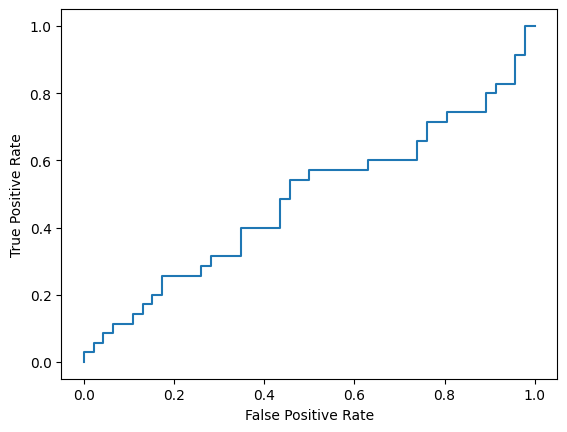

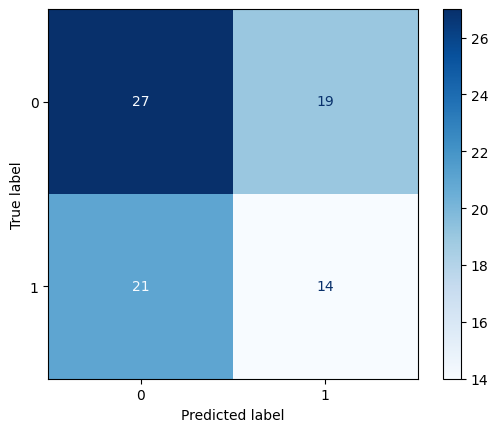

In [45]:
y_pred = model.predict(X_test_data_gsr_real)
y_pred = y_pred.flatten()

#Generate and display ROC curve
fpr, tpr, _ = roc_curve(y_test_data_gsr_real,y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


threshold = 0.5
y_pred_labels = (y_pred >= threshold).astype(int)
#Generate and display confusion matrix
cm = confusion_matrix(y_test_data_gsr_real, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

# EEG 2D CNN Model with image input

In [19]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(file_paths, target_size=(25, 8), color_mode='grayscale'):
    images = []
    for path in file_paths:
        image = load_img(path, target_size=target_size, color_mode=color_mode)
        image_array = img_to_array(image)
        images.append(image_array)
    return np.array(images)

#Load training, validation, and test data for 'all' and 'real' datasets with the paths created before
train_images_all = load_images(X_eeg_train_paths_all)
val_images_all = load_images(X_eeg_val_paths_all)
test_images_all = load_images(X_eeg_test_paths_all)

train_images_real = load_images(X_eeg_train_paths_real)
val_images_real = load_images(X_eeg_val_paths_real)
test_images_real = load_images(X_eeg_test_paths_real)

#Convert labels to numpy arrays
y_train_all = np.array(y_eeg_train_paths_all)
y_val_all = np.array(y_eeg_val_paths_all)
y_test_all = np.array(y_eeg_test_paths_all)

y_train_real = np.array(y_eeg_train_paths_real)
y_val_real = np.array(y_eeg_val_paths_real)
y_test_real = np.array(y_eeg_test_paths_real)

#Check shapes of the loaded data
print(f'Train Images All Shape: {train_images_all.shape}')
print(f'Validation Images All Shape: {val_images_all.shape}')
print(f'Test Images All Shape: {test_images_all.shape}')

print(f'Train Images Real Shape: {train_images_real.shape}')
print(f'Validation Images Real Shape: {val_images_real.shape}')
print(f'Test Images Real Shape: {test_images_real.shape}')


Train Images All Shape: (1019, 25, 8, 1)
Validation Images All Shape: (127, 25, 8, 1)
Test Images All Shape: (128, 25, 8, 1)
Train Images Real Shape: (643, 25, 8, 1)
Validation Images Real Shape: (80, 25, 8, 1)
Test Images Real Shape: (81, 25, 8, 1)


## All data combined

In [48]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [49]:
def cnn2D(input_shape):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))

    #First layer
    model.add(layers.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    #Second layer
    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    #Third layer
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    #Flatten and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  #sigmoid for binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [50]:
input_shape = (25, 8,1)
model = cnn2D(input_shape)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 8, 8)          80        
                                                                 
 batch_normalization (Batch  (None, 25, 8, 8)          32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 4, 8)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 4, 16)         1168      
                                                                 
 batch_normalization_1 (Bat  (None, 12, 4, 16)         64        
 chNormalization)                                                
                                                      

In [51]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor the validation loss
                               patience=10,          # Number of epochs with no improvement after which training will be stopped
                               verbose=1,           # Print messages when stopping
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

In [53]:
history = model.fit(
    x = train_images_all,
    y = y_train_all,
    epochs=100,
    batch_size = 32,
    validation_data = (val_images_all, y_val_all),
    callbacks = [early_stopping]
)

loss, accuracy = model.evaluate(test_images_all, y_test_all)
print(f'Test accuracy: {accuracy * 100:.2f}%')



Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.9162 - accuracy: 0.4769 - val_loss: 0.7184 - val_accuracy: 0.4803
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7935 - accuracy: 0.5309 - val_loss: 0.7383 - val_accuracy: 0.4803
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7314 - accuracy: 0.5515 - val_loss: 0.7311 - val_accuracy: 0.4567
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7116 - accuracy: 0.5348 - val_loss: 0.7062 - val_accuracy: 0.4882
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7190 - accuracy: 0.5456 - val_loss: 0.7024 - val_accuracy: 0.4961
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5407 - val_loss: 0.7016 - val_accuracy: 0.5118
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.5643 - val_loss: 0.6998 - val_accuracy: 0.5512
Epoch 8/100


In [54]:
model.save('./Trained models/eeg_model_all.keras')


## Real only

In [71]:
def cnn2D(input_shape):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))

    #First layer
    model.add(layers.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    #Second layer
    model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    #Third layer
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    #Flatten and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  #sigmoid for binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [72]:
input_shape = (25, 8,1)
model = cnn2D(input_shape)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 25, 8, 8)          80        
                                                                 
 batch_normalization_6 (Bat  (None, 25, 8, 8)          32        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 4, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 4, 16)         1168      
                                                                 
 batch_normalization_7 (Bat  (None, 12, 4, 16)         64        
 chNormalization)                                                
                                                      

In [73]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [74]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor the validation loss
                               patience=10,          # Number of epochs with no improvement after which training will be stopped
                               verbose=1,           # Print messages when stopping
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

In [75]:
history = model.fit(
    x = train_images_real,
    y = y_train_real,
    epochs=100,
    validation_data = (val_images_real, y_val_real),
    callbacks = [early_stopping],
    batch_size = 32
)

loss, accuracy = model.evaluate(test_images_real, y_test_real)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/100
21/21 [==============================] - 1s 12ms/step - loss: 0.9179 - accuracy: 0.4868 - val_loss: 0.8299 - val_accuracy: 0.5500
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.8396 - accuracy: 0.5008 - val_loss: 0.8202 - val_accuracy: 0.4500
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 0.8048 - accuracy: 0.5272 - val_loss: 0.8211 - val_accuracy: 0.4875
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.7704 - accuracy: 0.5226 - val_loss: 0.7291 - val_accuracy: 0.5875
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.7505 - accuracy: 0.5272 - val_loss: 0.8024 - val_accuracy: 0.6000
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7212 - accuracy: 0.5365 - val_loss: 0.7142 - val_accuracy: 0.4250
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.7036 - accuracy: 0.5614 - val_loss: 0.7338 - val_accuracy: 0.4750
Epoch 8/100


In [76]:
model.save('./Trained models/eeg_model_real.keras')


# Random forest and gradient boost on new EEG features

### All combined data

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import joblib

pos_class = pd.read_csv('./all_combined/positive_eeg.csv',header = None)
neg_class = pd.read_csv('./all_combined/negative_eeg.csv',header = None)


In [33]:
#Combine data
X = np.vstack((pos_class, neg_class))
y = np.hstack((np.ones(pos_class.shape[0]), np.zeros(neg_class.shape[0])))

#Split features data
X_train_features_all, X_val_features_all, X_test_features_all = X[X_train_indices_all], X[X_val_indices_all], X[X_test_indices_all]
y_train_features_all, y_val_features_all, y_test_features_all = y[y_train_indices_all], y[y_val_indices_all], y[y_test_indices_all]

#Set best parameters
rf_params = {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
gb_params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

#Instantiate and fit the models
rf = RandomForestClassifier(**rf_params, random_state=42)
gb = GradientBoostingClassifier(**gb_params, random_state=42)

rf.fit(X_train_features_all, y_train_features_all)
gb.fit(X_train_features_all, y_train_features_all)

#Save trained models for ensemble
joblib.dump(rf, './Trained models/rf_model_all.joblib')
joblib.dump(gb, './Trained models/gb_model_all.joblib')

#Predict and evaluate
rf_pred_val = rf.predict(X_val_features_all)
gb_pred_val = gb.predict(X_val_features_all)

rf_f1 = f1_score(y_test_features_all[:-1], rf_pred_val)
gb_f1 = f1_score(y_test_features_all[:-1], gb_pred_val)
rf_accuracy = accuracy_score(y_test_features_all[:-1], rf_pred_val)
gb_accuracy = accuracy_score(y_test_features_all[:-1], gb_pred_val)

print(f"Random Forest F1 score: {rf_f1:.2f}")
print(f"Gradient Boosting Classifier F1 score: {gb_f1:.2f}")

print(f"Random Forest test accuracy: {rf_accuracy * 100:.2f}%")
print(f"Gradient Boosting test accuracy: {gb_accuracy * 100:.2f}%")

Random Forest F1 score: 0.41
Gradient Boosting Classifier F1 score: 0.49
Random Forest test accuracy: 44.88%
Gradient Boosting test accuracy: 48.03%


### Real only data

In [34]:
pos_class = pd.read_csv('./real_only/positive_eeg.csv',header = None)
neg_class = pd.read_csv('./real_only/negative_eeg.csv',header = None)

In [35]:
#Combine data
X = np.vstack((pos_class, neg_class))
y = np.hstack((np.ones(pos_class.shape[0]), np.zeros(neg_class.shape[0])))

#Split features data
X_train_features_real, X_val_features_real, X_test_features_real = X[X_train_indices_real], X[X_val_indices_real], X[X_test_indices_real]
y_train_features_real, y_val_features_real, y_test_features_real = y[y_train_indices_real], y[y_val_indices_real], y[y_test_indices_real]

#Set best parameters
rf_params = {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
gb_params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

#Instantiate and fit the models
rf = RandomForestClassifier(**rf_params, random_state=42)
gb = GradientBoostingClassifier(**gb_params, random_state=42)

rf.fit(X_train_features_real, y_train_features_real)
gb.fit(X_train_features_real, y_train_features_real)

#Save trained models for ensemble
joblib.dump(rf, './Trained models/rf_model_real.joblib')
joblib.dump(gb, './Trained models/gb_model_real.joblib')

#Predict and evaluate
rf_pred_val = rf.predict(X_val_features_real)
gb_pred_val = gb.predict(X_val_features_real)

rf_f1 = f1_score(y_test_features_real[:-1], rf_pred_val)
gb_f1 = f1_score(y_test_features_real[:-1], gb_pred_val)
rf_accuracy = accuracy_score(y_test_features_real[:-1], rf_pred_val)
gb_accuracy = accuracy_score(y_test_features_real[:-1], gb_pred_val)

print(f"Random Forest F1 score: {rf_f1:.2f}")
print(f"Gradient Boosting Classifier F1 score: {gb_f1:.2f}")

print(f"Random Forest test accuracy: {rf_accuracy * 100:.2f}%")
print(f"Gradient Boosting test accuracy: {gb_accuracy * 100:.2f}%")

Random Forest F1 score: 0.42
Gradient Boosting Classifier F1 score: 0.52
Random Forest test accuracy: 41.25%
Gradient Boosting test accuracy: 47.50%


# Ensemble Model

In [64]:
from keras.models import load_model, Model
from keras.layers import concatenate, Reshape
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input, Dense, concatenate, Flatten, Lambda, Layer
from tensorflow.keras.models import Model
import joblib

In [100]:
#Load saved models
hr_model_all = load_model('Trained models/hr_model_all.keras')
gsr_model_all = load_model('Trained models/gsr_model_all.keras')
eeg_model_all_img = load_model('Trained models/eeg_model_all.keras')
gb_model_all = joblib.load('Trained models/gb_model_all.joblib')
rf_model_all = joblib.load('Trained models/rf_model_all.joblib')

hr_model_real = load_model('Trained models/hr_model_real.keras')
gsr_model_real = load_model('Trained models/gsr_model_real.keras')
eeg_model_real_img = load_model('Trained models/eeg_model_real.keras')
gb_model_real = joblib.load('Trained models/gb_model_real.joblib')
rf_model_real = joblib.load('Trained models/rf_model_real.joblib')

hr_model_all.trainable = False
gsr_model_all.trainable = False
eeg_model_all_img.trainable = False
gb_model_all.trainable = False
rf_model_all.trainable = False

hr_model_real.trainable = False
gsr_model_real.trainable = False
eeg_model_real_img.trainable = False
gb_model_real.trainable = False
rf_model_real.trainable = False


In [66]:
X_train_data_gsr_all.shape, X_train_data_hr_all.shape, train_images_all.shape

((1019, 8, 1), (1019, 8, 1), (1019, 25, 8, 1))

In [67]:
X_val_data_gsr_all.shape, X_val_data_hr_all.shape, val_images_all.shape

((127, 8, 1), (127, 8, 1), (127, 25, 8, 1))

In [68]:
X_test_data_gsr_all.shape, X_test_data_hr_all.shape, test_images_all.shape

((128, 8, 1), (128, 8, 1), (128, 25, 8, 1))

## Model 1: All combined GSR HR and EEG image data

In [103]:
#Inputs for all combined models
hr_input_all = Input(shape=(8, 1), name="hr_input_all")
gsr_input_all = Input(shape=(8, 1), name="gsr_input_all")
eeg_input_all_img = Input(shape=(25, 8, 1), name="eeg_input_all_img")

#Create variables to store in the runs
accuracies_all = []
roc_curves_all = []
confusion_matrices_all = []

for run in range(30):
    #Define output with loaded model and input
    hr_output_all = hr_model_all(hr_input_all)
    gsr_output_all = gsr_model_all(gsr_input_all)
    eeg_output_all = eeg_model_all_img(eeg_input_all_img)

    #Flatten the output of EEG model to match the dimensions HR and GSR outputs
    eeg_output_all_flattened = Flatten()(eeg_output_all)

    #Flatten HR and GSR outputs to match the dimensions
    hr_output_all_flattened = Flatten()(hr_output_all)
    gsr_output_all_flattened = Flatten()(gsr_output_all)

    #Concatenate outputs
    concatenated = concatenate([hr_output_all_flattened, gsr_output_all_flattened, eeg_output_all_flattened])

    #Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[eeg_input_all_img, hr_input_all, gsr_input_all], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [train_images_all, X_train_data_hr_all, X_train_data_gsr_all], y_train_data_hr_all,
        validation_data=([val_images_all, X_val_data_hr_all, X_val_data_gsr_all], y_val_data_hr_all),
        epochs=100, batch_size=32, verbose=0,
        callbacks = [early_stopping]
    )

    #Evaluation
    loss, accuracy = ensemble_model.evaluate([test_images_all, X_test_data_hr_all, X_test_data_gsr_all], y_test_data_hr_all, verbose=0)
    accuracies_all.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([test_images_all, X_test_data_hr_all, X_test_data_gsr_all]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_hr_all, y_pred)
    roc_curves_all.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_hr_all, y_pred_labels)
    confusion_matrices_all.append(cm)



Restoring model weights from the end of the best epoch: 10.
Epoch 20: early stopping
Run 1: Test accuracy: 61.72%
4/4 [==============================] - 1s 6ms/step
Restoring model weights from the end of the best epoch: 12.
Epoch 22: early stopping
Run 2: Test accuracy: 59.38%
4/4 [==============================] - 1s 9ms/step
Restoring model weights from the end of the best epoch: 41.
Epoch 51: early stopping
Run 3: Test accuracy: 59.38%
4/4 [==============================] - 1s 8ms/step
Restoring model weights from the end of the best epoch: 14.
Epoch 24: early stopping
Run 4: Test accuracy: 60.94%
4/4 [==============================] - 1s 8ms/step
Restoring model weights from the end of the best epoch: 11.
Epoch 21: early stopping
Run 5: Test accuracy: 61.72%
4/4 [==============================] - 1s 8ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 20: early stopping
Run 6: Test accuracy: 60.94%
4/4 [==============================] - 1s 8ms/step
Restoring 


Mean Accuracy: 61.02%
Standard Deviation: 0.84%
95% Confidence Interval: [60.71%, 61.32%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\3290472522.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


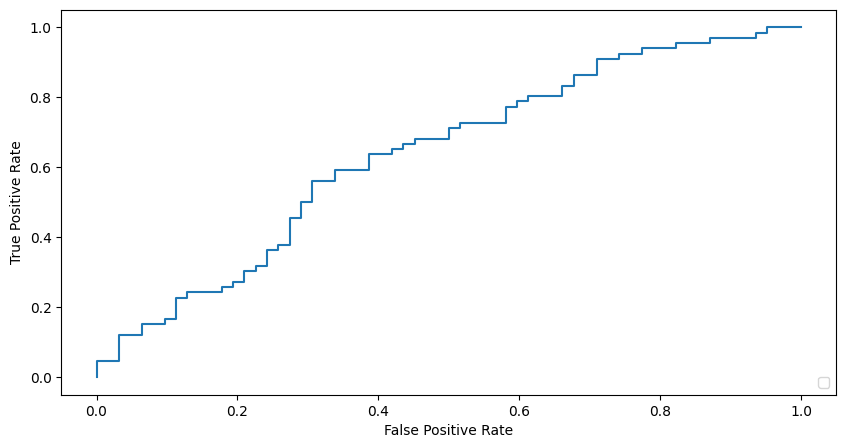

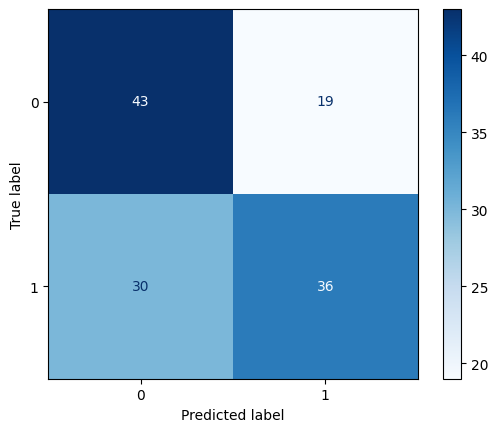

In [104]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_all = np.mean(accuracies_all)
std_accuracy_all = np.std(accuracies_all)
conf_interval_all = (mean_accuracy_all - 1.96 * std_accuracy_all / np.sqrt(len(accuracies_all)),
                     mean_accuracy_all + 1.96 * std_accuracy_all / np.sqrt(len(accuracies_all)))


print(f"\nMean Accuracy: {mean_accuracy_all:.2f}%")
print(f"Standard Deviation: {std_accuracy_all:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_all[0]:.2f}%, {conf_interval_all[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is plotted here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_all[0]
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_all[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 2: Real only GSR HR and EEG image data

In [101]:
#Inputs for real models
hr_input_real = Input(shape=(8, 1), name="hr_input_real")
gsr_input_real = Input(shape=(8, 1), name="gsr_input_real")
eeg_input_real_img = Input(shape=(25, 8, 1), name="eeg_input_real_img")

#Create variables to store in the runs
accuracies_real = []
roc_curves_real = []
confusion_matrices_real = []

for run in range(30):
    #Define output with loaded model and input
    hr_output_real = hr_model_real(hr_input_real)
    gsr_output_real = gsr_model_real(gsr_input_real)
    eeg_output_real = eeg_model_real_img(eeg_input_real_img)

    #Flatten the output of EEG model to match the dimensions HR and GSR outputs
    eeg_output_real_flattened = Flatten()(eeg_output_real)

    #Flatten HR and GSR outputs to match the dimensions
    hr_output_real_flattened = Flatten()(hr_output_real)
    gsr_output_real_flattened = Flatten()(gsr_output_real)

    #Concatenate outputs
    concatenated = concatenate([hr_output_real_flattened, gsr_output_real_flattened, eeg_output_real_flattened])

    # Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[eeg_input_real_img, hr_input_real, gsr_input_real], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [train_images_real, X_train_data_hr_real, X_train_data_gsr_real], y_train_data_hr_real,
        validation_data=([val_images_real, X_val_data_hr_real, X_val_data_gsr_real], y_val_data_hr_real),
        epochs=100, batch_size=32, verbose=0,
        callbacks = [early_stopping]
    )

    #Evaluate model
    loss, accuracy = ensemble_model.evaluate([test_images_real, X_test_data_hr_real, X_test_data_gsr_real], y_test_data_hr_real, verbose=0)
    accuracies_real.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([test_images_real, X_test_data_hr_real, X_test_data_gsr_real]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_hr_real, y_pred)
    roc_curves_real.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_hr_real, y_pred_labels)
    confusion_matrices_real.append(cm)

    

Restoring model weights from the end of the best epoch: 25.
Epoch 35: early stopping
Run 1: Test accuracy: 69.14%
3/3 [==============================] - 1s 6ms/step
Restoring model weights from the end of the best epoch: 18.
Epoch 28: early stopping
Run 2: Test accuracy: 70.37%
3/3 [==============================] - 1s 5ms/step
Restoring model weights from the end of the best epoch: 30.
Epoch 40: early stopping
Run 3: Test accuracy: 70.37%
3/3 [==============================] - 1s 5ms/step
Restoring model weights from the end of the best epoch: 45.
Epoch 55: early stopping
Run 4: Test accuracy: 72.84%
3/3 [==============================] - 1s 5ms/step
Restoring model weights from the end of the best epoch: 25.
Epoch 35: early stopping
Run 5: Test accuracy: 70.37%
3/3 [==============================] - 1s 6ms/step
Restoring model weights from the end of the best epoch: 19.
Epoch 29: early stopping
Run 6: Test accuracy: 70.37%
3/3 [==============================] - 1s 7ms/step
Restoring 


Mean Accuracy: 70.12%
Standard Deviation: 2.26%
95% Confidence Interval: [69.31%, 70.93%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\3639426115.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


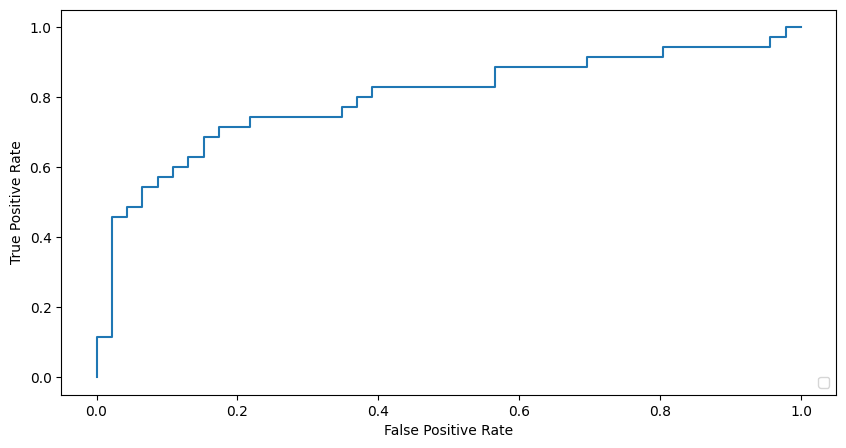

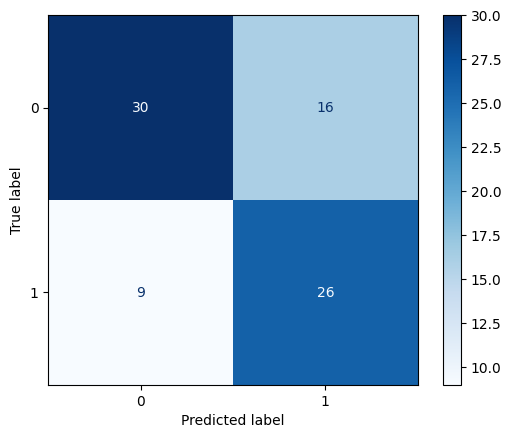

In [102]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_real = np.mean(accuracies_real)
std_accuracy_real = np.std(accuracies_real)
conf_interval_real = (mean_accuracy_real - 1.96 * std_accuracy_real / np.sqrt(len(accuracies_real)),
                      mean_accuracy_real + 1.96 * std_accuracy_real / np.sqrt(len(accuracies_real)))

print(f"\nMean Accuracy: {mean_accuracy_real:.2f}%")
print(f"Standard Deviation: {std_accuracy_real:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_real[0]:.2f}%, {conf_interval_real[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is plotted here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_real[0]
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_real[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 3: All combined GSR HR and EEG features data

In [105]:
#Inputs for all combined models
hr_input_all = Input(shape=(8, 1), name="hr_input_all")
gsr_input_all = Input(shape=(8, 1), name="gsr_input_all")
rf_input_all = Input(shape=(15,), name="rf_input_all")
gb_input_all = Input(shape=(15,), name="gb_input_all")

#Conversion for RF and GB model into tensor (created with GPT-4o)
class SklearnModelWrapper(tf.keras.layers.Layer):
    def __init__(self, model, output_dim, **kwargs):
        super(SklearnModelWrapper, self).__init__(**kwargs)
        self.model = model
        self.output_dim = output_dim

    def call(self, inputs):
        def predict(inputs):
            inputs = inputs.numpy()
            predictions = self.model.predict(inputs)
            return predictions

        predictions = tf.py_function(predict, [inputs], tf.float32)
        predictions.set_shape([None, self.output_dim])
        return predictions

rf_output_dim = 1
gb_output_dim = 1

#Create variables to store in every run
accuracies_all_features = []
roc_curves_all_features = []
confusion_matrices_all_features = []

for run in range(30):
    #Define output with loaded model and input
    hr_output_all = hr_model_all(hr_input_all)
    gsr_output_all = gsr_model_all(gsr_input_all)

    #Outputs from RF and GB models
    rf_output_all = SklearnModelWrapper(rf_model_all, output_dim=rf_output_dim)(rf_input_all)
    gb_output_all = SklearnModelWrapper(gb_model_all, output_dim=gb_output_dim)(gb_input_all)

    #Reshape RF and GB outputs to match GSR and HR dimensions
    rf_output_all_reshaped = Reshape((-1,))(rf_output_all)
    gb_output_all_reshaped = Reshape((-1,))(gb_output_all)

    #Flatten HR and GSR outputs to match the dimensions
    hr_output_all_flattened = Flatten()(hr_output_all)
    gsr_output_all_flattened = Flatten()(gsr_output_all)

    #Concatenate outputs
    concatenated = concatenate([hr_output_all_flattened, gsr_output_all_flattened, rf_output_all_reshaped, gb_output_all_reshaped])

    #Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[hr_input_all, gsr_input_all, rf_input_all, gb_input_all], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [X_train_data_hr_all, X_train_data_gsr_all, X_train_features_all, X_train_features_all], y_train_data_hr_all,
        validation_data=([X_val_data_hr_all, X_val_data_gsr_all, X_val_features_all, X_val_features_all], y_val_data_hr_all),
        epochs=100, batch_size=32, verbose=0,
        callbacks=[early_stopping]
    )

    #Evaluation
    loss, accuracy = ensemble_model.evaluate([X_test_data_hr_all, X_test_data_gsr_all, X_test_features_all, X_test_features_all], y_test_data_hr_all, verbose=0)
    accuracies_all_features.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([X_test_data_hr_all, X_test_data_gsr_all, X_test_features_all, X_test_features_all]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_hr_all, y_pred)
    roc_curves_all_features.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_hr_all, y_pred_labels)
    confusion_matrices_all_features.append(cm)
    

Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 1: Test accuracy: 49.22%
4/4 [==============================] - 1s 8ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 2: Test accuracy: 51.56%
4/4 [==============================] - 0s 7ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 3: Test accuracy: 49.22%
4/4 [==============================] - 0s 6ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 4: Test accuracy: 49.22%
4/4 [==============================] - 0s 7ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 5: Test accuracy: 49.22%
4/4 [==============================] - 0s 6ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 6: Test accuracy: 49.22%
4/4 [==============================] - 0s 7ms/step
Restoring model 


Mean Accuracy: 49.32%
Standard Deviation: 0.56%
95% Confidence Interval: [49.12%, 49.52%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\329069245.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


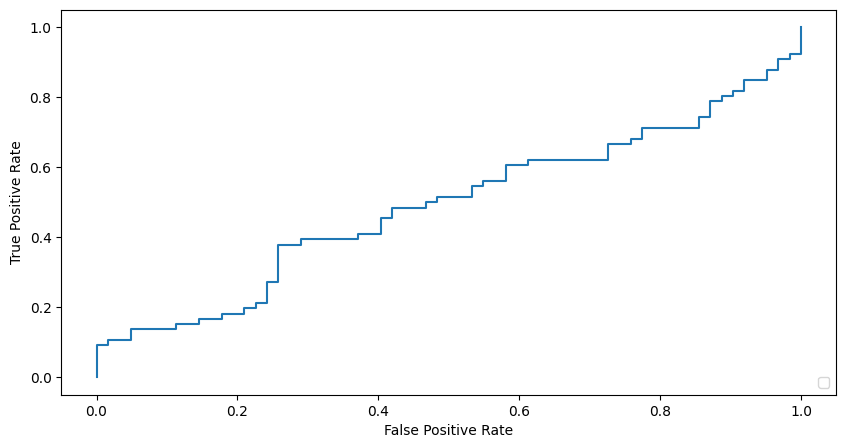

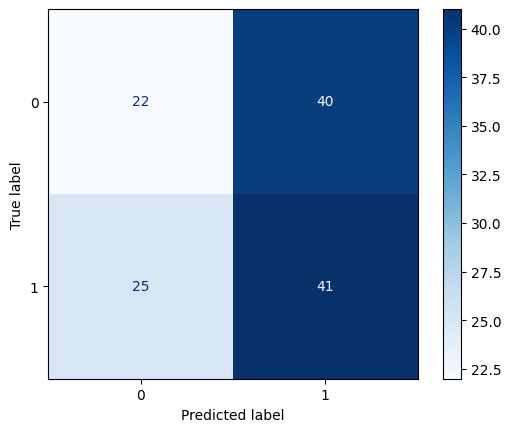

In [106]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_all = np.mean(accuracies_all_features)
std_accuracy_all = np.std(accuracies_all_features)
conf_interval_all = (mean_accuracy_all - 1.96 * std_accuracy_all / np.sqrt(len(accuracies_all_features)),
                      mean_accuracy_all + 1.96 * std_accuracy_all / np.sqrt(len(accuracies_all_features)))

print(f"\nMean Accuracy: {mean_accuracy_all:.2f}%")
print(f"Standard Deviation: {std_accuracy_all:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_all[0]:.2f}%, {conf_interval_all[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is plotted shown here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_all_features[0]
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_all_features[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 4: Real only GSR HR and EEG features data

In [107]:
#Inputs for real models
hr_input_real = Input(shape=(8, 1), name="hr_input_real")
gsr_input_real = Input(shape=(8, 1), name="gsr_input_real")
rf_input_real = Input(shape=(15,), name="rf_input_real")
gb_input_real = Input(shape=(15,), name="gb_input_real")

#Conversion for RF and GB model into tensor format (created with GPT-4o)
class SklearnModelWrapper(tf.keras.layers.Layer):
    def __init__(self, model, output_dim, **kwargs):
        super(SklearnModelWrapper, self).__init__(**kwargs)
        self.model = model
        self.output_dim = output_dim

    def call(self, inputs):
        def predict(inputs):
            inputs = inputs.numpy()
            predictions = self.model.predict(inputs)
            return predictions

        predictions = tf.py_function(predict, [inputs], tf.float32)
        predictions.set_shape([None, self.output_dim])
        return predictions

rf_output_dim = 1
gb_output_dim = 1

#Create variables to store in every run
accuracies_real_features = []
roc_curves_real_features = []
confusion_matrices_real_features = []

for run in range(30):
    #Define output with loaded model and input
    hr_output_real = hr_model_real(hr_input_real)
    gsr_output_real = gsr_model_real(gsr_input_real)

    #Outputs from RF and GB models
    rf_output_real = SklearnModelWrapper(rf_model_real, output_dim=rf_output_dim)(rf_input_real)
    gb_output_real = SklearnModelWrapper(gb_model_real, output_dim=gb_output_dim)(gb_input_real)

    #Reshape RF and GB outputs to match GSR and HR dimensions
    rf_output_real_reshaped = Reshape((-1,))(rf_output_real)
    gb_output_real_reshaped = Reshape((-1,))(gb_output_real)

    #Flatten HR and GSR outputs to match the dimensions
    hr_output_real_flattened = Flatten()(hr_output_real)
    gsr_output_real_flattened = Flatten()(gsr_output_real)

    #Concatenate outputs
    concatenated = concatenate([hr_output_real_flattened, gsr_output_real_flattened, rf_output_real_reshaped, gb_output_real_reshaped])

    #Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[hr_input_real, gsr_input_real, rf_input_real, gb_input_real], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [X_train_data_hr_real, X_train_data_gsr_real, X_train_features_real, X_train_features_real], y_train_data_hr_real,
        validation_data=([X_val_data_hr_real, X_val_data_gsr_real, X_val_features_real, X_val_features_real], y_val_data_hr_real),
        epochs=100, batch_size=32, verbose=1,
        callbacks=[early_stopping]
    )

    #Evaluation
    loss, accuracy = ensemble_model.evaluate([X_test_data_hr_real, X_test_data_gsr_real, X_test_features_real, X_test_features_real], y_test_data_hr_real, verbose=0)
    accuracies_real_features.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([X_test_data_hr_real, X_test_data_gsr_real, X_test_features_real, X_test_features_real]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_hr_real, y_pred)
    roc_curves_real_features.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_hr_real, y_pred_labels)
    confusion_matrices_real_features.append(cm)
    

Epoch 1/100
21/21 [==============================] - 3s 39ms/step - loss: 0.5457 - accuracy: 0.9082 - val_loss: 0.7127 - val_accuracy: 0.5750
Epoch 2/100
21/21 [==============================] - 0s 11ms/step - loss: 0.2986 - accuracy: 1.0000 - val_loss: 0.9368 - val_accuracy: 0.5750
Epoch 3/100
21/21 [==============================] - 0s 11ms/step - loss: 0.1129 - accuracy: 1.0000 - val_loss: 1.3778 - val_accuracy: 0.5750
Epoch 4/100
21/21 [==============================] - 0s 11ms/step - loss: 0.0379 - accuracy: 1.0000 - val_loss: 1.8411 - val_accuracy: 0.5750
Epoch 5/100
21/21 [==============================] - 0s 10ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 2.1806 - val_accuracy: 0.5750
Epoch 6/100
21/21 [==============================] - 0s 11ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 2.4349 - val_accuracy: 0.5750
Epoch 7/100
21/21 [==============================] - 0s 11ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 2.6475 - val_accuracy: 0.5750
Epoch 


Mean Accuracy: 50.58%
Standard Deviation: 0.50%
95% Confidence Interval: [50.40%, 50.76%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\2818646679.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


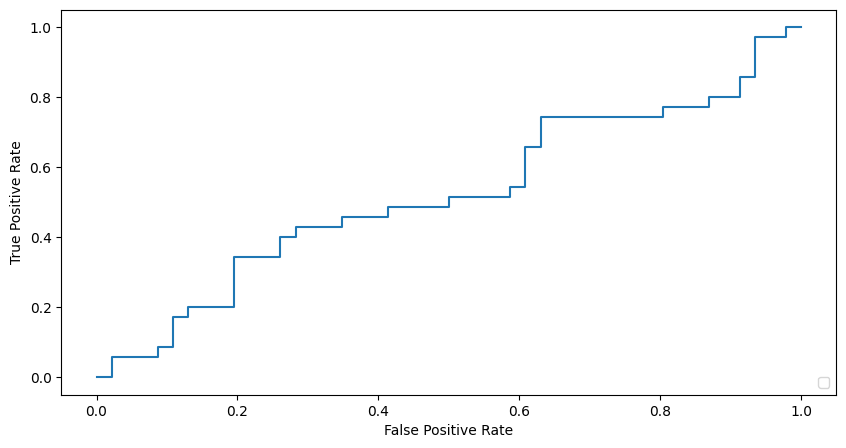

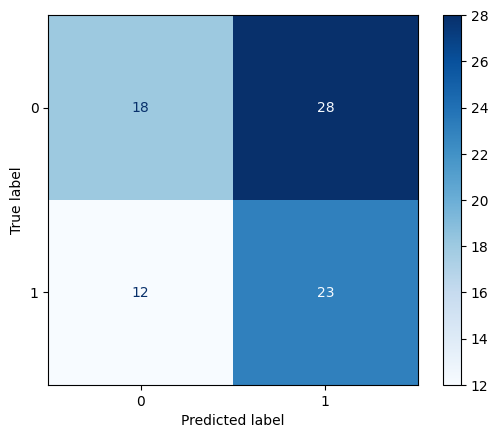

In [108]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_real = np.mean(accuracies_real_features)
std_accuracy_real = np.std(accuracies_real_features)
conf_interval_real = (mean_accuracy_real - 1.96 * std_accuracy_real / np.sqrt(len(accuracies_real_features)),
                      mean_accuracy_real + 1.96 * std_accuracy_real / np.sqrt(len(accuracies_real_features)))

print(f"\nMean Accuracy: {mean_accuracy_real:.2f}%")
print(f"Standard Deviation: {std_accuracy_real:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_real[0]:.2f}%, {conf_interval_real[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is plotted shown here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_real_features[0]
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_real_features[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 5: All combined HR and EEG image data

In [109]:
#Inputs for all combined models
hr_input_all = Input(shape=(8, 1), name="hr_input_all")
eeg_input_all_img = Input(shape=(25, 8, 1), name="eeg_input_all_img")

#Create variables to store in the runs
accuracies_all_hr_eeg = []
roc_curves_all_hr_eeg = []
confusion_matrices_all_hr_eeg = []

for run in range(30):
    #Define output with loaded model and input
    hr_output_all = hr_model_all(hr_input_all)
    eeg_output_all = eeg_model_all_img(eeg_input_all_img)

    #Flatten the output of EEG model to match the dimensions HR output
    eeg_output_all_flattened = Flatten()(eeg_output_all)

    #Flatten HR output to match the dimensions
    hr_output_all_flattened = Flatten()(hr_output_all)


    #Concatenate outputs
    concatenated = concatenate([hr_output_all_flattened, eeg_output_all_flattened])

    #Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[eeg_input_all_img, hr_input_all], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [train_images_all, X_train_data_hr_all], y_train_data_hr_all,
        validation_data=([val_images_all, X_val_data_hr_all], y_val_data_hr_all),
        epochs=100, batch_size=32, verbose=0,
        callbacks = [early_stopping]
    )

    #Evaluation
    loss, accuracy = ensemble_model.evaluate([test_images_all, X_test_data_hr_all], y_test_data_hr_all, verbose=0)
    accuracies_all_hr_eeg.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([test_images_all, X_test_data_hr_all]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_hr_all, y_pred)
    roc_curves_all_hr_eeg.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_hr_all, y_pred_labels)
    confusion_matrices_all_hr_eeg.append(cm)



Restoring model weights from the end of the best epoch: 18.
Epoch 28: early stopping
Run 1: Test accuracy: 58.59%
4/4 [==============================] - 0s 5ms/step
Restoring model weights from the end of the best epoch: 14.
Epoch 24: early stopping
Run 2: Test accuracy: 59.38%
4/4 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 13.
Epoch 23: early stopping
Run 3: Test accuracy: 61.72%
4/4 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 19.
Epoch 29: early stopping
Run 4: Test accuracy: 59.38%
4/4 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 12.
Epoch 22: early stopping
Run 5: Test accuracy: 59.38%
4/4 [==============================] - 0s 5ms/step
Restoring model weights from the end of the best epoch: 22.
Epoch 32: early stopping
Run 6: Test accuracy: 61.72%
4/4 [==============================] - 0s 4ms/step
Restoring 


Mean Accuracy: 60.05%
Standard Deviation: 1.32%
95% Confidence Interval: [59.58%, 60.52%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\1746354201.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


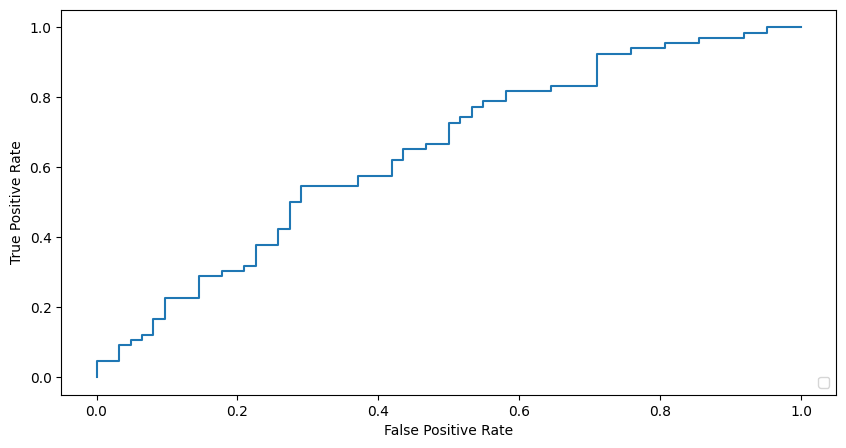

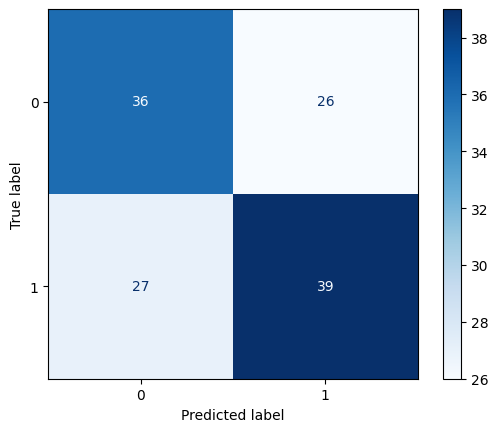

In [110]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_all_hr_eeg = np.mean(accuracies_all_hr_eeg)
std_accuracy_all_hr_eeg = np.std(accuracies_all_hr_eeg)
conf_interval_all_hr_eeg = (mean_accuracy_all_hr_eeg - 1.96 * std_accuracy_all_hr_eeg / np.sqrt(len(accuracies_all_hr_eeg)),
                     mean_accuracy_all_hr_eeg + 1.96 * std_accuracy_all_hr_eeg / np.sqrt(len(accuracies_all_hr_eeg)))


print(f"\nMean Accuracy: {mean_accuracy_all_hr_eeg:.2f}%")
print(f"Standard Deviation: {std_accuracy_all_hr_eeg:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_all_hr_eeg[0]:.2f}%, {conf_interval_all_hr_eeg[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is plotted here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_all_hr_eeg[0]
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_all_hr_eeg[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 6: Real HR and EEG image data

In [111]:
#Inputs for real combined models
hr_input_real = Input(shape=(8, 1), name="hr_input_real")
eeg_input_real_img = Input(shape=(25, 8, 1), name="eeg_input_real_img")

#Create variables to store in the runs
accuracies_real_hr_eeg = []
roc_curves_real_hr_eeg = []
confusion_matrices_real_hr_eeg = []

for run in range(30):
    #Define output with loaded model and input
    hr_output_real = hr_model_real(hr_input_real)
    eeg_output_real = eeg_model_real_img(eeg_input_real_img)

    #Flatten the output of EEG model to match the dimensions HR output
    eeg_output_real_flattened = Flatten()(eeg_output_real)

    #Flatten HR output to match the dimensions
    hr_output_real_flattened = Flatten()(hr_output_real)


    #Concatenate outputs
    concatenated = concatenate([hr_output_real_flattened, eeg_output_real_flattened])

    #Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[eeg_input_real_img, hr_input_real], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [train_images_real, X_train_data_hr_real], y_train_data_hr_real,
        validation_data=([val_images_real, X_val_data_hr_real], y_val_data_hr_real),
        epochs=100, batch_size=32, verbose=0,
        callbacks = [early_stopping]
    )

    #Evaluation
    loss, accuracy = ensemble_model.evaluate([test_images_real, X_test_data_hr_real], y_test_data_hr_real, verbose=0)
    accuracies_real_hr_eeg.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([test_images_real, X_test_data_hr_real]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_hr_real, y_pred)
    roc_curves_real_hr_eeg.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_hr_real, y_pred_labels)
    confusion_matrices_real_hr_eeg.append(cm)



Restoring model weights from the end of the best epoch: 28.
Epoch 38: early stopping
Run 1: Test accuracy: 71.60%
3/3 [==============================] - 0s 5ms/step
Restoring model weights from the end of the best epoch: 28.
Epoch 38: early stopping
Run 2: Test accuracy: 67.90%
3/3 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 28.
Epoch 38: early stopping
Run 3: Test accuracy: 74.07%
3/3 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 25.
Epoch 35: early stopping
Run 4: Test accuracy: 72.84%
3/3 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 27.
Epoch 37: early stopping
Run 5: Test accuracy: 72.84%
3/3 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 19.
Epoch 29: early stopping
Run 6: Test accuracy: 72.84%
3/3 [==============================] - 0s 4ms/step
Restoring 


Mean Accuracy: 71.36%
Standard Deviation: 1.73%
95% Confidence Interval: [70.74%, 71.98%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\3622055320.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


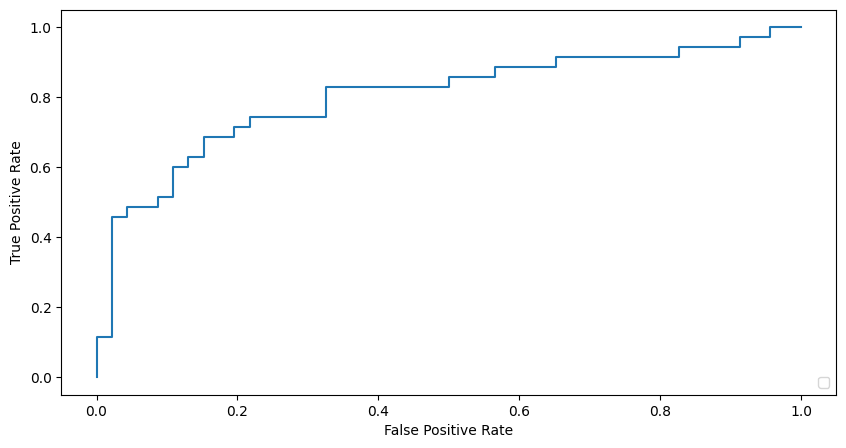

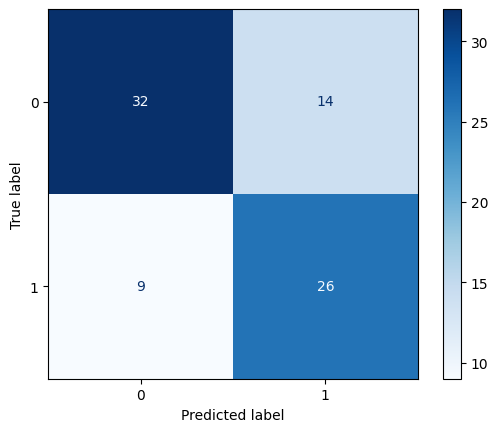

In [112]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_real_hr_eeg = np.mean(accuracies_real_hr_eeg)
std_accuracy_real_hr_eeg = np.std(accuracies_real_hr_eeg)
conf_interval_real_hr_eeg = (mean_accuracy_real_hr_eeg - 1.96 * std_accuracy_real_hr_eeg / np.sqrt(len(accuracies_real_hr_eeg)),
                     mean_accuracy_real_hr_eeg + 1.96 * std_accuracy_real_hr_eeg / np.sqrt(len(accuracies_real_hr_eeg)))


print(f"\nMean Accuracy: {mean_accuracy_real_hr_eeg:.2f}%")
print(f"Standard Deviation: {std_accuracy_real_hr_eeg:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_real_hr_eeg[0]:.2f}%, {conf_interval_real_hr_eeg[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is plotted here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_real_hr_eeg[0]
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_real_hr_eeg[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 7: All combined GSR and EEG image data

In [113]:
#Inputs for all combined models
gsr_input_all = Input(shape=(8, 1), name="gsr_input_all")
eeg_input_all_img = Input(shape=(25, 8, 1), name="eeg_input_all_img")

#Create variables to store in the runs
accuracies_all_gsr_eeg = []
roc_curves_all_gsr_eeg = []
confusion_matrices_all_gsr_eeg = []

for run in range(30):
    #Define output with loaded model and input
    gsr_output_all = gsr_model_all(gsr_input_all)
    eeg_output_all = eeg_model_all_img(eeg_input_all_img)

    #Flatten the output of EEG model to match the dimensions GSR output
    eeg_output_all_flattened = Flatten()(eeg_output_all)

    #Flatten GSR output to match the dimensions
    gsr_output_all_flattened = Flatten()(gsr_output_all)

    #Concatenate outputs
    concatenated = concatenate([gsr_output_all_flattened, eeg_output_all_flattened])

    #Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[eeg_input_all_img, gsr_input_all], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [train_images_all, X_train_data_gsr_all], y_train_data_gsr_all,
        validation_data=([val_images_all, X_val_data_gsr_all], y_val_data_gsr_all),
        epochs=100, batch_size=32, verbose=0,
        callbacks = [early_stopping]
    )

    #Evaluation
    loss, accuracy = ensemble_model.evaluate([test_images_all, X_test_data_gsr_all], y_test_data_gsr_all, verbose=0)
    accuracies_all_gsr_eeg.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([test_images_all, X_test_data_gsr_all]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_gsr_all, y_pred)
    roc_curves_all_gsr_eeg.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_gsr_all, y_pred_labels)
    confusion_matrices_all_gsr_eeg.append(cm)

Restoring model weights from the end of the best epoch: 3.
Epoch 13: early stopping
Run 1: Test accuracy: 54.69%
4/4 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping
Run 2: Test accuracy: 56.25%
4/4 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 3.
Epoch 13: early stopping
Run 3: Test accuracy: 53.91%
4/4 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 4: Test accuracy: 53.91%
4/4 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 5: Test accuracy: 53.91%
4/4 [==============================] - 0s 4ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 6: Test accuracy: 55.47%
4/4 [==============================] - 0s 4ms/step
Restoring model 


Mean Accuracy: 53.85%
Standard Deviation: 1.77%
95% Confidence Interval: [53.22%, 54.49%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\1153755255.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


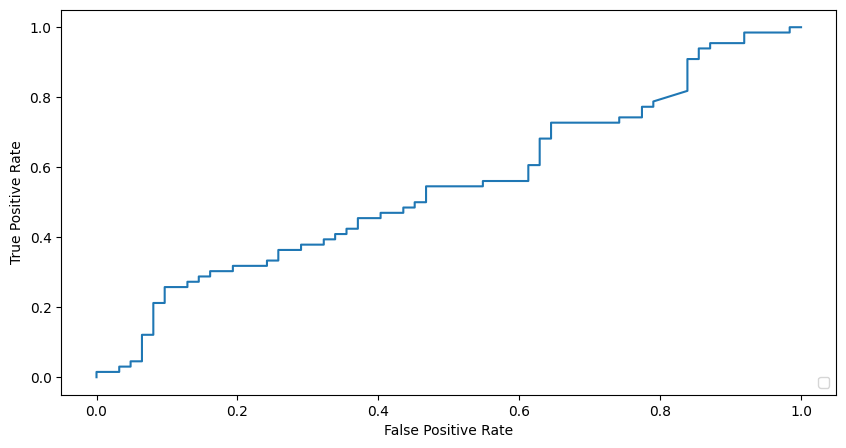

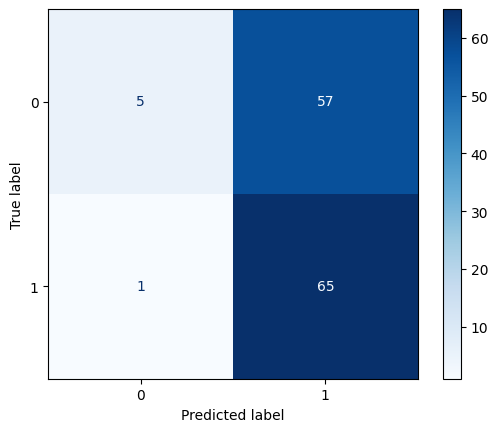

In [114]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_all_gsr_eeg = np.mean(accuracies_all_gsr_eeg)
std_accuracy_all_gsr_eeg = np.std(accuracies_all_gsr_eeg)
conf_interval_all_gsr_eeg = (mean_accuracy_all_gsr_eeg - 1.96 * std_accuracy_all_gsr_eeg / np.sqrt(len(accuracies_all_gsr_eeg)),
                             mean_accuracy_all_gsr_eeg + 1.96 * std_accuracy_all_gsr_eeg / np.sqrt(len(accuracies_all_gsr_eeg)))


print(f"\nMean Accuracy: {mean_accuracy_all_gsr_eeg:.2f}%")
print(f"Standard Deviation: {std_accuracy_all_gsr_eeg:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_all_gsr_eeg[0]:.2f}%, {conf_interval_all_gsr_eeg[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is plotted here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_all_gsr_eeg[0]
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_all_gsr_eeg[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 8: Real GSR and EEG image data

In [129]:
#Inputs for real combined models
gsr_input_real = Input(shape=(8, 1), name="gsr_input_real")
eeg_input_real_img = Input(shape=(25, 8, 1), name="eeg_input_real_img")

#Create variables to store in the runs
accuracies_real_gsr_eeg = []
roc_curves_real_gsr_eeg = []
confusion_matrices_real_gsr_eeg = []

for run in range(30):
    #Define output with loaded model and input
    gsr_output_real = gsr_model_real(gsr_input_real)
    eeg_output_real = eeg_model_real_img(eeg_input_real_img)

    #Flatten the output of EEG model to match the dimensions GSR output
    eeg_output_real_flattened = Flatten()(eeg_output_real)

    #Flatten GSR output to match the dimensions
    gsr_output_real_flattened = Flatten()(gsr_output_real)

    #Concatenate outputs
    concatenated = concatenate([gsr_output_real_flattened, eeg_output_real_flattened])

    #Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[eeg_input_real_img, gsr_input_real], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [train_images_real, X_train_data_gsr_real], y_train_data_gsr_real,
        validation_data=([val_images_real, X_val_data_gsr_real], y_val_data_gsr_real),
        epochs=100, batch_size=32, verbose=0,
        callbacks = [early_stopping]
    )

    #Evaluation
    loss, accuracy = ensemble_model.evaluate([test_images_real, X_test_data_gsr_real], y_test_data_gsr_real, verbose=0)
    accuracies_real_gsr_eeg.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([test_images_real, X_test_data_gsr_real]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_gsr_real, y_pred)
    roc_curves_real_gsr_eeg.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_gsr_real, y_pred_labels)
    confusion_matrices_real_gsr_eeg.append(cm)

Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 1: Test accuracy: 43.21%
3/3 [==============================] - 0s 0s/step
Restoring model weights from the end of the best epoch: 13.
Epoch 23: early stopping
Run 2: Test accuracy: 43.21%
3/3 [==============================] - 0s 5ms/step
Restoring model weights from the end of the best epoch: 9.
Epoch 19: early stopping
Run 3: Test accuracy: 43.21%
3/3 [==============================] - 0s 5ms/step
Restoring model weights from the end of the best epoch: 10.
Epoch 20: early stopping
Run 4: Test accuracy: 43.21%
3/3 [==============================] - 0s 6ms/step
Restoring model weights from the end of the best epoch: 5.
Epoch 15: early stopping
Run 5: Test accuracy: 43.21%
3/3 [==============================] - 0s 6ms/step
Restoring model weights from the end of the best epoch: 6.
Epoch 16: early stopping
Run 6: Test accuracy: 43.21%
3/3 [==============================] - 0s 3ms/step
Restoring model


Mean Accuracy: 43.74%
Standard Deviation: 1.26%
95% Confidence Interval: [43.29%, 44.20%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\285513240.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


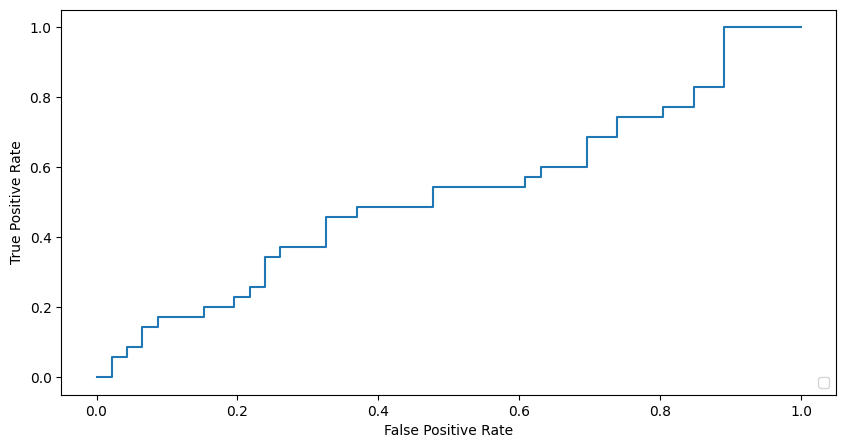

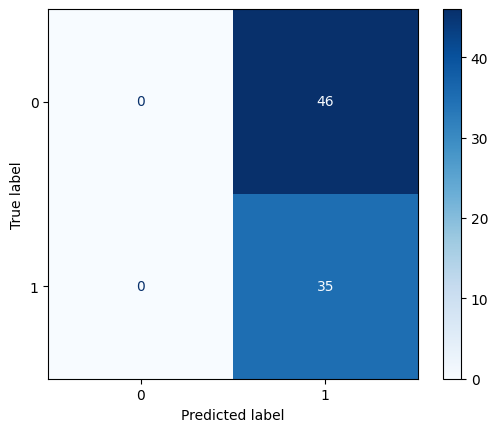

In [116]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_real_gsr_eeg = np.mean(accuracies_real_gsr_eeg)
std_accuracy_real_gsr_eeg = np.std(accuracies_real_gsr_eeg)
conf_interval_real_gsr_eeg = (mean_accuracy_real_gsr_eeg - 1.96 * std_accuracy_real_gsr_eeg / np.sqrt(len(accuracies_real_gsr_eeg)),
                              mean_accuracy_real_gsr_eeg + 1.96 * std_accuracy_real_gsr_eeg / np.sqrt(len(accuracies_real_gsr_eeg)))


print(f"\nMean Accuracy: {mean_accuracy_real_gsr_eeg:.2f}%")
print(f"Standard Deviation: {std_accuracy_real_gsr_eeg:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_real_gsr_eeg[0]:.2f}%, {conf_interval_real_gsr_eeg[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is plotted here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_real_gsr_eeg[0]
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_real_gsr_eeg[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 9: All combined HR and EEG features data

In [117]:
#Inputs for all combined models
hr_input_all = Input(shape=(8, 1), name="hr_input_all")
rf_input_all = Input(shape=(15,), name="rf_input_all")
gb_input_all = Input(shape=(15,), name="gb_input_all")

#Conversion for RF and GB model into tensor (created with GPT-4o)
class SklearnModelWrapper(tf.keras.layers.Layer):
    def __init__(self, model, output_dim, **kwargs):
        super(SklearnModelWrapper, self).__init__(**kwargs)
        self.model = model
        self.output_dim = output_dim

    def call(self, inputs):
        def predict(inputs):
            inputs = inputs.numpy()
            predictions = self.model.predict(inputs)
            return predictions

        predictions = tf.py_function(predict, [inputs], tf.float32)
        predictions.set_shape([None, self.output_dim])
        return predictions

rf_output_dim = 1
gb_output_dim = 1

#Create variables to store in every run
accuracies_all_features_hr = []
roc_curves_all_features_hr = []
confusion_matrices_all_features_hr = []

for run in range(30):
    #Define output with loaded model and input
    hr_output_all = hr_model_all(hr_input_all)

    #Outputs from RF and GB models
    rf_output_all = SklearnModelWrapper(rf_model_all, output_dim=rf_output_dim)(rf_input_all)
    gb_output_all = SklearnModelWrapper(gb_model_all, output_dim=gb_output_dim)(gb_input_all)

    #Reshape RF and GB outputs to match HR dimensions
    rf_output_all_reshaped = Reshape((-1,))(rf_output_all)
    gb_output_all_reshaped = Reshape((-1,))(gb_output_all)

    #Flatten HR output to match the dimensions
    hr_output_all_flattened = Flatten()(hr_output_all)

    #Concatenate outputs
    concatenated = concatenate([hr_output_all_flattened, rf_output_all_reshaped, gb_output_all_reshaped])

    #Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[hr_input_all, rf_input_all, gb_input_all], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [X_train_data_hr_all, X_train_features_all, X_train_features_all], y_train_data_hr_all,
        validation_data=([X_val_data_hr_all, X_val_features_all, X_val_features_all], y_val_data_hr_all),
        epochs=100, batch_size=32, verbose=0,
        callbacks=[early_stopping]
    )

    #Evaluation
    loss, accuracy = ensemble_model.evaluate([X_test_data_hr_all, X_test_features_all, X_test_features_all], y_test_data_hr_all, verbose=0)
    accuracies_all_features_hr.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([X_test_data_hr_all, X_test_features_all, X_test_features_all]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_hr_all, y_pred)
    roc_curves_all_features_hr.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_hr_all, y_pred_labels)
    confusion_matrices_all_features_hr.append(cm)
    

Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 1: Test accuracy: 49.22%
4/4 [==============================] - 0s 6ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 2: Test accuracy: 49.22%
4/4 [==============================] - 0s 7ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 3: Test accuracy: 49.22%
4/4 [==============================] - 0s 6ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 4: Test accuracy: 49.22%
4/4 [==============================] - 0s 9ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 5: Test accuracy: 49.22%
4/4 [==============================] - 0s 6ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 6: Test accuracy: 49.22%
4/4 [==============================] - 0s 6ms/step
Restoring model 


Mean Accuracy: 49.30%
Standard Deviation: 0.31%
95% Confidence Interval: [49.19%, 49.41%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\2934279371.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


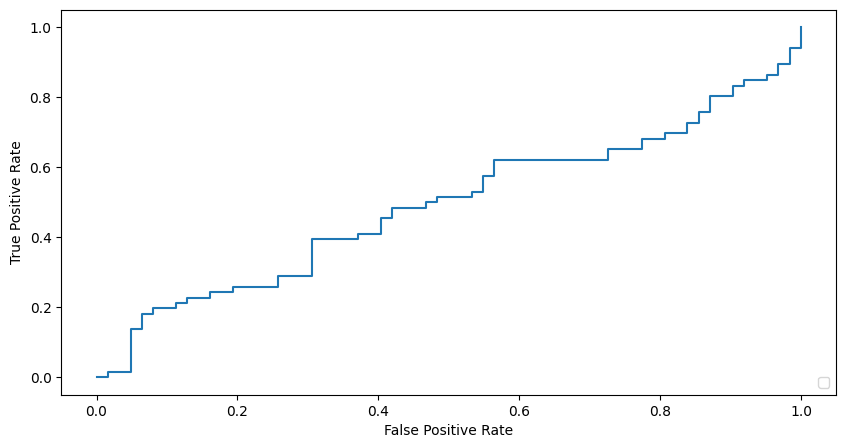

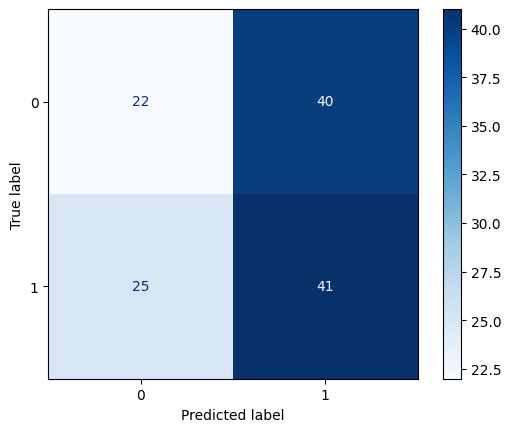

In [118]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_all_hr = np.mean(accuracies_all_features_hr)
std_accuracy_all_hr = np.std(accuracies_all_features_hr)
conf_interval_all_hr = (mean_accuracy_all_hr - 1.96 * std_accuracy_all_hr / np.sqrt(len(accuracies_all_features_hr)),
                      mean_accuracy_all_hr + 1.96 * std_accuracy_all_hr / np.sqrt(len(accuracies_all_features_hr)))

print(f"\nMean Accuracy: {mean_accuracy_all_hr:.2f}%")
print(f"Standard Deviation: {std_accuracy_all_hr:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_all_hr[0]:.2f}%, {conf_interval_all_hr[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is plotted shown here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_all_features_hr[0]
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_all_features_hr[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 10: Real combined HR and EEG features data

In [119]:
#Inputs for real combined models
hr_input_real = Input(shape=(8, 1), name="hr_input_real")
rf_input_real = Input(shape=(15,), name="rf_input_real")
gb_input_real = Input(shape=(15,), name="gb_input_real")

#Conversion for RF and GB model into tensor (created with GPT-4o)
class SklearnModelWrapper(tf.keras.layers.Layer):
    def __init__(self, model, output_dim, **kwargs):
        super(SklearnModelWrapper, self).__init__(**kwargs)
        self.model = model
        self.output_dim = output_dim

    def call(self, inputs):
        def predict(inputs):
            inputs = inputs.numpy()
            predictions = self.model.predict(inputs)
            return predictions

        predictions = tf.py_function(predict, [inputs], tf.float32)
        predictions.set_shape([None, self.output_dim])
        return predictions

rf_output_dim = 1
gb_output_dim = 1

#Create variables to store in every run
accuracies_real_features_hr = []
roc_curves_real_features_hr = []
confusion_matrices_real_features_hr = []

for run in range(30):
    #Define output with loaded model and input
    hr_output_real = hr_model_real(hr_input_real)

    #Outputs from RF and GB models
    rf_output_real = SklearnModelWrapper(rf_model_real, output_dim=rf_output_dim)(rf_input_real)
    gb_output_real = SklearnModelWrapper(gb_model_real, output_dim=gb_output_dim)(gb_input_real)

    #Reshape RF and GB outputs to match HR dimensions
    rf_output_real_reshaped = Reshape((-1,))(rf_output_real)
    gb_output_real_reshaped = Reshape((-1,))(gb_output_real)

    #Flatten HR output to match the dimensions
    hr_output_real_flattened = Flatten()(hr_output_real)

    #Concatenate outputs
    concatenated = concatenate([hr_output_real_flattened, rf_output_real_reshaped, gb_output_real_reshaped])

    #Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[hr_input_real, rf_input_real, gb_input_real], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [X_train_data_hr_real, X_train_features_real, X_train_features_real], y_train_data_hr_real,
        validation_data=([X_val_data_hr_real, X_val_features_real, X_val_features_real], y_val_data_hr_real),
        epochs=100, batch_size=32, verbose=0,
        callbacks=[early_stopping]
    )

    #Evaluation
    loss, accuracy = ensemble_model.evaluate([X_test_data_hr_real, X_test_features_real, X_test_features_real], y_test_data_hr_real, verbose=0)
    accuracies_real_features_hr.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([X_test_data_hr_real, X_test_features_real, X_test_features_real]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_hr_real, y_pred)
    roc_curves_real_features_hr.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_hr_real, y_pred_labels)
    confusion_matrices_real_features_hr.append(cm)

Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 1: Test accuracy: 53.09%
3/3 [==============================] - 0s 8ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 2: Test accuracy: 50.62%
3/3 [==============================] - 0s 7ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 3: Test accuracy: 50.62%
3/3 [==============================] - 0s 7ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 4: Test accuracy: 50.62%
3/3 [==============================] - 0s 8ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 5: Test accuracy: 48.15%
3/3 [==============================] - 0s 7ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 6: Test accuracy: 50.62%
3/3 [==============================] - 0s 7ms/step
Restoring model 


Mean Accuracy: 50.45%
Standard Deviation: 0.89%
95% Confidence Interval: [50.14%, 50.77%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\2160490924.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


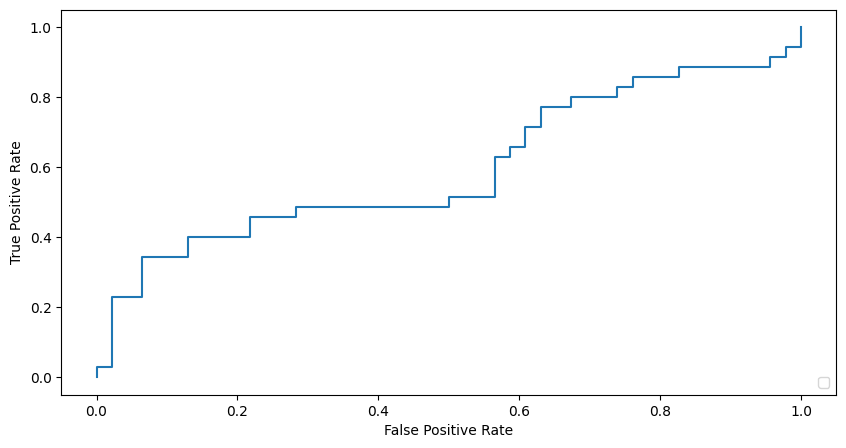

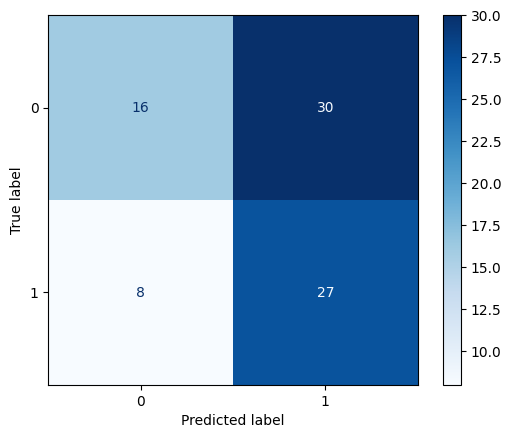

In [120]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_real_hr = np.mean(accuracies_real_features_hr)
std_accuracy_real_hr = np.std(accuracies_real_features_hr)
conf_interval_real_hr = (mean_accuracy_real_hr - 1.96 * std_accuracy_real_hr / np.sqrt(len(accuracies_real_features_hr)),
                         mean_accuracy_real_hr + 1.96 * std_accuracy_real_hr / np.sqrt(len(accuracies_real_features_hr)))

print(f"\nMean Accuracy: {mean_accuracy_real_hr:.2f}%")
print(f"Standard Deviation: {std_accuracy_real_hr:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_real_hr[0]:.2f}%, {conf_interval_real_hr[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is shown here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_real_features_hr[0]
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_real_features_hr[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 11: All combined GSR and EEG features data

In [121]:
#Inputs for all combined models
gsr_input_all = Input(shape=(8, 1), name="gsr_input_all")
rf_input_all = Input(shape=(15,), name="rf_input_all")
gb_input_all = Input(shape=(15,), name="gb_input_all")

#Conversion for RF and GB model into tensor (created with GPT-4o)
class SklearnModelWrapper(tf.keras.layers.Layer):
    def __init__(self, model, output_dim, **kwargs):
        super(SklearnModelWrapper, self).__init__(**kwargs)
        self.model = model
        self.output_dim = output_dim

    def call(self, inputs):
        def predict(inputs):
            inputs = inputs.numpy()
            predictions = self.model.predict(inputs)
            return predictions

        predictions = tf.py_function(predict, [inputs], tf.float32)
        predictions.set_shape([None, self.output_dim])
        return predictions

rf_output_dim = 1
gb_output_dim = 1

#Create variables to store in every run
accuracies_all_features_gsr = []
roc_curves_all_features_gsr = []
confusion_matrices_all_features_gsr = []

for run in range(30):
    #Define output with loaded model and input
    gsr_output_all = gsr_model_all(gsr_input_all)

    #Outputs from RF and GB models
    rf_output_all = SklearnModelWrapper(rf_model_all, output_dim=rf_output_dim)(rf_input_all)
    gb_output_all = SklearnModelWrapper(gb_model_all, output_dim=gb_output_dim)(gb_input_all)

    #Reshape RF and GB outputs to match GSR dimensions
    rf_output_all_reshaped = Reshape((-1,))(rf_output_all)
    gb_output_all_reshaped = Reshape((-1,))(gb_output_all)

    #Flatten GSR output to match the dimensions
    gsr_output_all_flattened = Flatten()(gsr_output_all)

    #Concatenate outputs
    concatenated = concatenate([gsr_output_all_flattened, rf_output_all_reshaped, gb_output_all_reshaped])

    #Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[gsr_input_all, rf_input_all, gb_input_all], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [X_train_data_gsr_all, X_train_features_all, X_train_features_all], y_train_data_gsr_all,
        validation_data=([X_val_data_gsr_all, X_val_features_all, X_val_features_all], y_val_data_gsr_all),
        epochs=100, batch_size=32, verbose=0,
        callbacks=[early_stopping]
    )

    #Evaluation
    loss, accuracy = ensemble_model.evaluate([X_test_data_gsr_all, X_test_features_all, X_test_features_all], y_test_data_gsr_all, verbose=0)
    accuracies_all_features_gsr.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([X_test_data_gsr_all, X_test_features_all, X_test_features_all]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_gsr_all, y_pred)
    roc_curves_all_features_gsr.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_gsr_all, y_pred_labels)
    confusion_matrices_all_features_gsr.append(cm)

Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 1: Test accuracy: 49.22%
4/4 [==============================] - 0s 6ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 2: Test accuracy: 49.22%
4/4 [==============================] - 0s 6ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 3: Test accuracy: 49.22%
4/4 [==============================] - 0s 6ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 4: Test accuracy: 49.22%
4/4 [==============================] - 0s 5ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 5: Test accuracy: 49.22%
4/4 [==============================] - 0s 5ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 6: Test accuracy: 49.22%
4/4 [==============================] - 0s 6ms/step
Restoring model 


Mean Accuracy: 49.22%
Standard Deviation: 0.00%
95% Confidence Interval: [49.22%, 49.22%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\2846965199.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


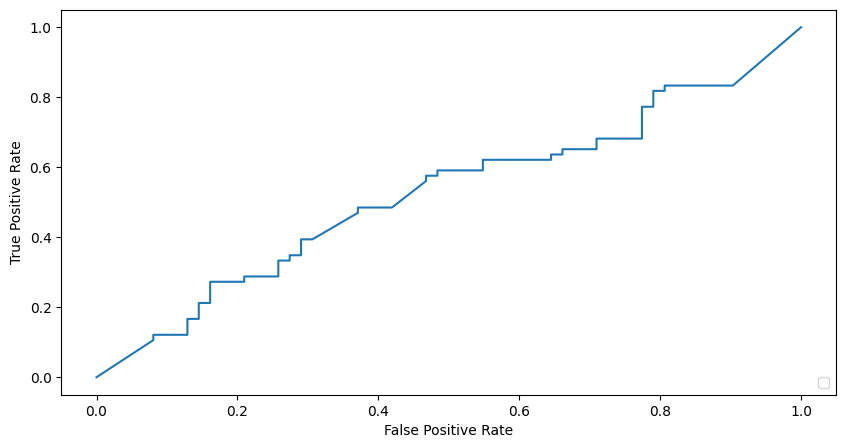

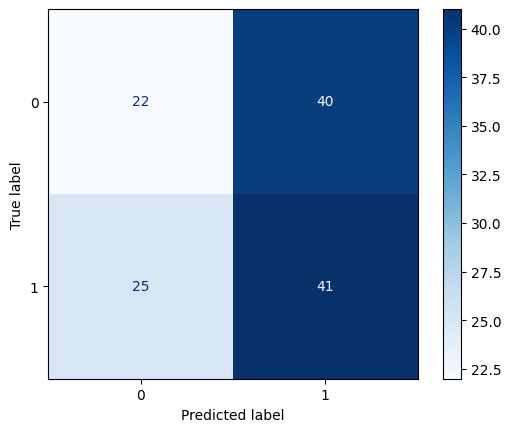

In [122]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_all_gsr = np.mean(accuracies_all_features_gsr)
std_accuracy_all_gsr = np.std(accuracies_all_features_gsr)
conf_interval_all_gsr = (mean_accuracy_all_gsr - 1.96 * std_accuracy_all_gsr / np.sqrt(len(accuracies_all_features_gsr)),
                         mean_accuracy_all_gsr + 1.96 * std_accuracy_all_gsr / np.sqrt(len(accuracies_all_features_gsr)))

print(f"\nMean Accuracy: {mean_accuracy_all_gsr:.2f}%")
print(f"Standard Deviation: {std_accuracy_all_gsr:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_all_gsr[0]:.2f}%, {conf_interval_all_gsr[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is shown here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_all_features_gsr[0]
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_all_features_gsr[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Model 12: Real combined GSR and EEG features data

In [123]:
#Inputs for real combined models
gsr_input_real = Input(shape=(8, 1), name="gsr_input_real")
rf_input_real = Input(shape=(15,), name="rf_input_real")
gb_input_real = Input(shape=(15,), name="gb_input_real")

#Conversion for RF and GB model into tensor (created with GPT-4o)
class SklearnModelWrapper(tf.keras.layers.Layer):
    def __init__(self, model, output_dim, **kwargs):
        super(SklearnModelWrapper, self).__init__(**kwargs)
        self.model = model
        self.output_dim = output_dim

    def call(self, inputs):
        def predict(inputs):
            inputs = inputs.numpy()
            predictions = self.model.predict(inputs)
            return predictions

        predictions = tf.py_function(predict, [inputs], tf.float32)
        predictions.set_shape([None, self.output_dim])
        return predictions

rf_output_dim = 1
gb_output_dim = 1

#Create variables to store in every run
accuracies_real_features_gsr = []
roc_curves_real_features_gsr = []
confusion_matrices_real_features_gsr = []

for run in range(30):
    #Define output with loaded model and input
    gsr_output_real = gsr_model_real(gsr_input_real)

    #Outputs from RF and GB models
    rf_output_real = SklearnModelWrapper(rf_model_real, output_dim=rf_output_dim)(rf_input_real)
    gb_output_real = SklearnModelWrapper(gb_model_real, output_dim=gb_output_dim)(gb_input_real)

    #Reshape RF and GB outputs to match GSR dimensions
    rf_output_real_reshaped = Reshape((-1,))(rf_output_real)
    gb_output_real_reshaped = Reshape((-1,))(gb_output_real)

    #Flatten GSR output to match the dimensions
    gsr_output_real_flattened = Flatten()(gsr_output_real)

    #Concatenate outputs
    concatenated = concatenate([gsr_output_real_flattened, rf_output_real_reshaped, gb_output_real_reshaped])

    #Add dense layers on top of concatenated outputs
    x = Dense(128, activation='relu')(concatenated)
    x = Dense(64, activation='relu')(x)
    final_output = Dense(1, activation='sigmoid')(x)

    #Instantiate model
    ensemble_model = Model(inputs=[gsr_input_real, rf_input_real, gb_input_real], outputs=final_output)
    ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Fit model
    ensemble_model.fit(
        [X_train_data_gsr_real, X_train_features_real, X_train_features_real], y_train_data_gsr_real,
        validation_data=([X_val_data_gsr_real, X_val_features_real, X_val_features_real], y_val_data_gsr_real),
        epochs=100, batch_size=32, verbose=0,
        callbacks=[early_stopping]
    )

    #Evaluation
    loss, accuracy = ensemble_model.evaluate([X_test_data_gsr_real, X_test_features_real, X_test_features_real], y_test_data_gsr_real, verbose=0)
    accuracies_real_features_gsr.append(accuracy * 100)
    print(f'Run {run+1}: Test accuracy: {accuracy * 100:.2f}%')

    #Store ROC curves
    y_pred = ensemble_model.predict([X_test_data_gsr_real, X_test_features_real, X_test_features_real]).flatten()
    fpr, tpr, _ = roc_curve(y_test_data_gsr_real, y_pred)
    roc_curves_real_features_gsr.append((fpr, tpr))

    #Store confusion matrices
    threshold = 0.5
    y_pred_labels = (y_pred >= threshold).astype(int)
    cm = confusion_matrix(y_test_data_gsr_real, y_pred_labels)
    confusion_matrices_real_features_gsr.append(cm)

Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 1: Test accuracy: 50.62%
3/3 [==============================] - 0s 7ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 2: Test accuracy: 50.62%
3/3 [==============================] - 0s 8ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 3: Test accuracy: 50.62%
3/3 [==============================] - 0s 7ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 4: Test accuracy: 50.62%
3/3 [==============================] - 0s 7ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 5: Test accuracy: 48.15%
3/3 [==============================] - 0s 7ms/step
Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Run 6: Test accuracy: 50.62%
3/3 [==============================] - 0s 7ms/step
Restoring model 


Mean Accuracy: 50.37%
Standard Deviation: 0.74%
95% Confidence Interval: [50.11%, 50.64%]


C:\Users\yifei\AppData\Local\Temp\ipykernel_1992\2184260394.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


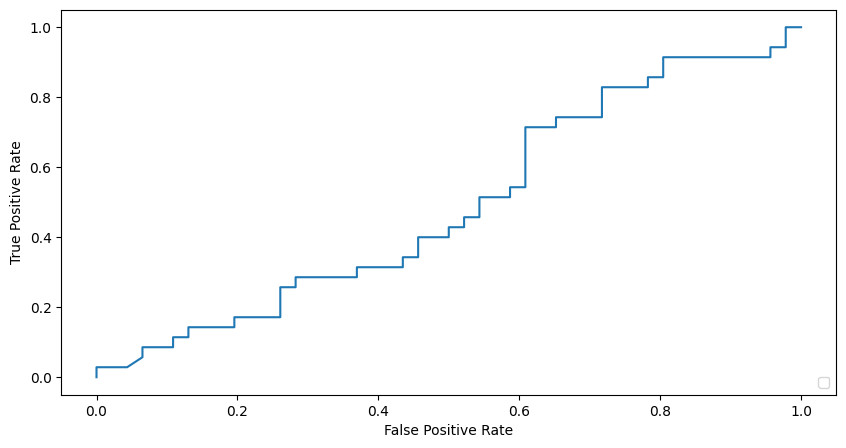

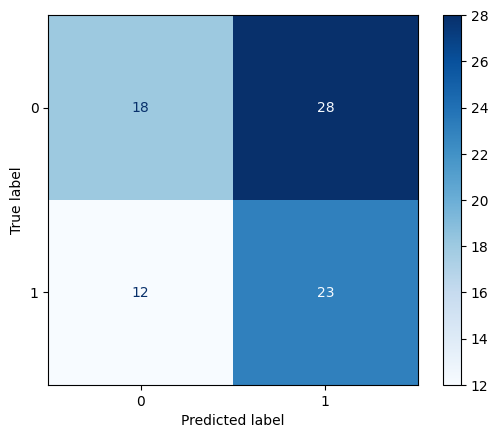

In [124]:
#Get mean, standard deviation, and confidence intervals of the 30 runs
mean_accuracy_real_gsr = np.mean(accuracies_real_features_gsr)
std_accuracy_real_gsr = np.std(accuracies_real_features_gsr)
conf_interval_real_gsr = (mean_accuracy_real_gsr - 1.96 * std_accuracy_real_gsr / np.sqrt(len(accuracies_real_features_gsr)),
                          mean_accuracy_real_gsr + 1.96 * std_accuracy_real_gsr / np.sqrt(len(accuracies_real_features_gsr)))

print(f"\nMean Accuracy: {mean_accuracy_real_gsr:.2f}%")
print(f"Standard Deviation: {std_accuracy_real_gsr:.2f}%")
print(f"95% Confidence Interval: [{conf_interval_real_gsr[0]:.2f}%, {conf_interval_real_gsr[1]:.2f}%]")

#All data for ROC and confusion matrices are stored, only the first one is shown here
plt.figure(figsize=(10, 5))
fpr, tpr = roc_curves_real_features_gsr[0]
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrices_real_features_gsr[0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Statistical tests

In [151]:
#Stored accuracy data from all ensemble models
accuracies = {
    "Model 1": accuracies_all,
    "Model 2": accuracies_real,
    "Model 3": accuracies_all_features,
    "Model 4": accuracies_real_features,
    "Model 5": accuracies_all_hr_eeg,
    "Model 6": accuracies_real_hr_eeg,
    "Model 7": accuracies_all_gsr_eeg,
    "Model 8": accuracies_real_gsr_eeg,
    "Model 9": accuracies_all_features_hr,
    "Model 10": accuracies_real_features_hr,
    "Model 11": accuracies_all_features_gsr,
    "Model 12": accuracies_real_features_gsr
}

In [152]:
accuracy_df = pd.DataFrame(accuracies)
accuracy_df

,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9,Model 10,Model 11,Model 12
0,61.71875,69.135803,49.21875,50.617284,58.59375,71.604937,54.68750,43.209878,49.21875,53.086418,49.21875,50.617284
1,59.37500,70.370370,51.56250,50.617284,59.37500,67.901236,56.25000,43.209878,49.21875,50.617284,49.21875,50.617284
2,59.37500,70.370370,49.21875,50.617284,61.71875,74.074072,53.90625,43.209878,49.21875,50.617284,49.21875,50.617284
3,60.93750,72.839504,49.21875,50.617284,59.37500,72.839504,53.90625,43.209878,49.21875,50.617284,49.21875,50.617284
4,61.71875,70.370370,49.21875,48.148149,59.37500,72.839504,53.90625,43.209878,49.21875,48.148149,49.21875,48.148149
5,60.93750,70.370370,49.21875,51.851851,61.71875,72.839504,55.46875,43.209878,49.21875,50.617284,49.21875,50.617284
6,61.71875,75.308645,49.21875,50.617284,61.71875,72.839504,56.25000,43.209878,49.21875,50.617284,49.21875,50.617284
7,61.71875,70.370370,48.43750,50.617284,59.37500,72.839504,53.90625,43.209878,49.21875,50.617284,49.21875,48.148149
8,61.71875,72.839504,49.21875,50.617284,59.37500,71.604937,53.12500,43.209878,49.21875,50.617284,49.21875,50.617284
9,60.15625,70.370370,50.00000,50.617284,61.71875,70.370370,53.90625,43.209878,49.21875,50.617284,49.21875,48.148149


In [153]:
#Reshape data for statistical tests
melted_df = accuracy_df.melt(var_name='Model', value_name='Accuracy')
melted_df

,Model,Accuracy
0,Model 1,61.718750
1,Model 1,59.375000
2,Model 1,59.375000
3,Model 1,60.937500
4,Model 1,61.718750
...,...,...
355,Model 12,50.617284
356,Model 12,50.617284
357,Model 12,50.617284
358,Model 12,50.617284


In [154]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#one way ANOVA test
anova_model = ols('Accuracy ~ Model', data=melted_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                sum_sq     df            F         PR(>F)
Model     25570.979244   11.0  1661.523008  3.950015e-293
Residual    486.886305  348.0          NaN            NaN


In [155]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Tukey's HSD test
tukey_hsd = pairwise_tukeyhsd(endog=melted_df['Accuracy'], groups=melted_df['Model'], alpha=0.05)
print(tukey_hsd)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
 Model 1 Model 10  -10.563    0.0 -11.5679   -9.558   True
 Model 1 Model 11 -11.7969    0.0 -12.8018 -10.7919   True
 Model 1 Model 12 -10.6453    0.0 -11.6502  -9.6403   True
 Model 1  Model 2   9.1078    0.0   8.1029  10.1128   True
 Model 1  Model 3 -11.6927    0.0 -12.6977 -10.6878   True
 Model 1  Model 4 -10.4395    0.0 -11.4444  -9.4345   True
 Model 1  Model 5  -0.9635 0.0742  -1.9685   0.0414  False
 Model 1  Model 6  10.3424    0.0   9.3375  11.3473   True
 Model 1  Model 7  -7.1615    0.0  -8.1664  -6.1565   True
 Model 1  Model 8 -17.5588    0.0 -18.5638 -16.5539   True
 Model 1  Model 9 -11.7188    0.0 -12.7237 -10.7138   True
Model 10 Model 11  -1.2339 0.0037  -2.2389   -0.229   True
Model 10 Model 12  -0.0823    1.0  -1.0872   0.9226  False
Model 10  Model 2  19.6708    0.0  18.6658  20.6757   Tr